In [1]:
#Importing the libraries
import sqlite3
import pandas as pd
import numpy as np


In [2]:
con = sqlite3.connect('accident_data_v1.0.0_2023.db')
cur = con.cursor()
res = cur.execute('SELECT name FROM sqlite_master')
res.fetchall()


[('accident',),
 ('sqlite_autoindex_accident_1',),
 ('casualty',),
 ('sqlite_autoindex_casualty_1',),
 ('vehicle',),
 ('sqlite_autoindex_vehicle_1',),
 ('lsoa',),
 ('sqlite_autoindex_lsoa_1',)]

### The different table dataframes for year 2020 will be cleaned based on the instruction of the STAT20 form

In [3]:
def numeric_minus_one_columns(df):
    """
    Returns a dataframe with -1 column
    """
    minus_one_column = []
    for col in df.columns:
        if df[col].eq(-1).any():
            minus_one_column.append(col)

 

    df = pd.DataFrame({"-1 for numeric columns": minus_one_column})
    return df

In [4]:
def object_minus_one_columns(df):
    """
    Returns a dataframe with -1 column
    """
    minus_one_column = []
    for col in df.columns:
        if df[col].eq('-1').any():
            minus_one_column.append(col)

 

    df = pd.DataFrame({"-1 for numeric columns": minus_one_column})
    return df

## Data cleaning of the accident dataframe

In [5]:
con = sqlite3.connect('accident_data_v1.0.0_2023.db')
cur = con.cursor()

accident = 'accident'
query = f"PRAGMA table_info({accident})"
cur.execute(query)

cols = [cols[1] for cols in cur.fetchall()]
for col in cols:
    print(col)

accident_index
accident_year
accident_reference
location_easting_osgr
location_northing_osgr
longitude
latitude
police_force
accident_severity
number_of_vehicles
number_of_casualties
date
day_of_week
time
local_authority_district
local_authority_ons_district
local_authority_highway
first_road_class
first_road_number
road_type
speed_limit
junction_detail
junction_control
second_road_class
second_road_number
pedestrian_crossing_human_control
pedestrian_crossing_physical_facilities
light_conditions
weather_conditions
road_surface_conditions
special_conditions_at_site
carriageway_hazards
urban_or_rural_area
did_police_officer_attend_scene_of_accident
trunk_road_flag
lsoa_of_accident_location


In [6]:
#Created a connection with the database
con = sqlite3.connect('accident_data_v1.0.0_2023.db')


query = 'SELECT * FROM accident WHERE accident_year = 2020;'
df_accident = pd.read_sql_query(query, con) #Converted accident table to a dataframe
df_accident

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,0,4,1,1,0,0,1,1,2,E01004763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,0,1,1,1,0,0,1,1,-1,-1
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1,0,0,1,2,-1,-1
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,0,1,1,1,0,0,2,1,-1,-1
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,0,1,1,1,0,0,1,2,-1,-1


In [7]:
df_accident.info() # Checking the information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91199 non-null  object 
 1   accident_year                                91199 non-null  int64  
 2   accident_reference                           91199 non-null  object 
 3   location_easting_osgr                        91185 non-null  float64
 4   location_northing_osgr                       91185 non-null  float64
 5   longitude                                    91185 non-null  float64
 6   latitude                                     91185 non-null  float64
 7   police_force                                 91199 non-null  int64  
 8   accident_severity                            91199 non-null  int64  
 9   number_of_vehicles                           91199 non-null  int64  
 10

In [8]:
df_accident.isna().sum() #checking ofr na values

accident_index                                  0
accident_year                                   0
accident_reference                              0
location_easting_osgr                          14
location_northing_osgr                         14
longitude                                      14
latitude                                       14
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                                            0
local_authority_district                        0
local_authority_ons_district                    0
local_authority_highway                         0
first_road_class                                0
first_road_number                               0
road_type                                       0


##### Columns in the accident dataframe with -1

In [9]:
numeric_minus_one_columns(df_accident)

,-1 for numeric columns
0,local_authority_district
1,speed_limit
2,junction_detail
3,junction_control
4,second_road_class
5,second_road_number
6,pedestrian_crossing_human_control
7,pedestrian_crossing_physical_facilities
8,light_conditions
9,weather_conditions


#### POLICE FORCE
NOTES
A. Enter the code number of the police force in whose area the accident occurred. The relevant codes are listed in Annex 6 on page 101.
B. Note that leading zeros are incorporated in some of these codes and must be entered (eg. the code for Cumbria is entered as 03).
12

In [10]:
df_accident['police_force'].unique() #checking for unique values

array([ 1,  3,  4,  5,  6,  7, 10, 11, 12, 13, 14, 16, 17, 20, 21, 22, 23,
       30, 31, 32, 33, 34, 35, 36, 37, 40, 41, 42, 43, 44, 45, 46, 47, 48,
       50, 52, 53, 54, 55, 60, 61, 62, 63, 99], dtype=int64)

In [11]:
#to write as a list comprehension
def numeric_minus_one_columns(df):
    """
    Returns a dataframe with -1 column
    """
    minus_one_column = []
    for col in df.columns:
        if df[col].eq(-1).any():
            minus_one_column.append(col)

 

    df = pd.DataFrame({"-1 for numeric columns": minus_one_column})
    return df

In [12]:
#Filling the values of the column with leading zeros where necessary with the zfill method
df_accident['police_force'] = df_accident['police_force'].apply(lambda i: str(i).zfill(2))

print(df_accident['police_force'])


0        01
1        01
2        01
3        01
4        01
         ..
91194    99
91195    99
91196    99
91197    99
91198    99
Name: police_force, Length: 91199, dtype: object


### The police force code at 99 are data error entries and will be replaced with other matching values that have the same location authority where police force == 99

In [13]:
# Police force code and district mapping for scotland
police_force_code_district = {
    '91': ['S12000017', 'S12000013', 'S12000023', 'S12000027'],
    '92': ['S12000033', 'S12000034', 'S12000020'],
    '93': ['S12000041', 'S12000042', 'S12000024'],
    '94': ['S12000015'],
    '95': ['S12000010', 'S12000036', 'S12000019', 'S12000026', 'S12000040'],
    '96': ['S12000005', 'S12000014', 'S12000030'],
    '97': ['S12000035', 'S12000008', 'S12000009', 'S12000011', 'S12000043', 'S12000018', 'S12000021', 'S12000044', 'S12000038', 'S12000028', 'S12000029', 'S12000039'],
    '98': ['S12000006']
}


# Replacing the police code ==99 with the correct police code
for i, r in df_accident.iterrows():
    if r['police_force'] == '99':
        location = r['local_authority_ons_district']
        for police_code, locations in police_force_code_district.items():
            if location in locations:
                df_accident.at[i, 'police_force'] =str(police_code)
                break

#printing the dataframe
df_accident[['police_force', 'local_authority_ons_district']]


,police_force,local_authority_ons_district
0,01,E09000032
1,01,E09000022
2,01,E09000033
3,01,E09000025
4,01,E09000033
...,...,...
91194,93,S12000042
91195,97,S12000011
91196,92,S12000033
91197,97,S12000044


In [14]:
df_accident['police_force'] = df_accident['police_force'].astype(str)

print(df_accident['police_force'].dtypes)

object


In [15]:
df_accident['police_force'].unique()

array(['01', '03', '04', '05', '06', '07', '10', '11', '12', '13', '14',
       '16', '17', '20', '21', '22', '23', '30', '31', '32', '33', '34',
       '35', '36', '37', '40', '41', '42', '43', '44', '45', '46', '47',
       '48', '50', '52', '53', '54', '55', '60', '61', '62', '63', '95',
       '97', '91', '98', '93', '96', '94', '92'], dtype=object)

#### ACCIDENT REFERENCE
NOTES
A. The accident reference allocated by the police must be unique within that police force for the
accident and for the calendar year in which it took place. It must also be sufficient for the police to
identify the accident in the event of a query.
B. The accident reference may contain a total of 7, or fewer, numbers and/or alphabetic characters in
any sequence convenient to Police Force requirements.
C. Unused spaces to the left of accident references containing less than 7 characters are to be coded
zero (eg. ABC123 would be coded 0ABC123). 

In [16]:
df_accident['accident_reference'].unique() #checking for unique values

array(['010219808', '010220496', '010228005', ..., '991030297',
       '991030900', '991032575'], dtype=object)

In [17]:
#checking for duplicate values in accident reference
df_accident['accident_reference'].duplicated().sum()

0

In [18]:
# Padding accident references with leading zeros using the python zfill method
df_accident['accident_reference']= [fill.zfill(7) for fill in df_accident['accident_reference'] ]


df_accident['accident_reference'].unique()

array(['010219808', '010220496', '010228005', ..., '991030297',
       '991030900', '991032575'], dtype=object)

### NUMBER OF VEHICLE RECORDS
NOTES
A. Enter the number of vehicle records submitted for the accident.
B. Unused boxes to the left of the number of vehicles should be coded zero (eg. if 2 vehicles were
involved, this item would be coded 002). 


In [19]:
# Padding number of vehicle records with leading  by using list comprehension
df_accident['number_of_vehicles'] = [str(veh).zfill(3) for veh in df_accident['number_of_vehicles']]

df_accident['number_of_vehicles'].unique()

array(['001', '002', '003', '004', '008', '006', '007', '005', '009',
       '010', '011', '013', '012'], dtype=object)

### NUMBER OF CASUALTY RECORDS
NOTES
A. Enter the number of casualty records submitted for the accident.
B. Unused boxes to the left of the number of casualty records should be coded zero (eg. if there were 3
casualty records, this item would be coded 003). 

In [20]:
# Padding number of vehicle records with leading  by using list comprehension
df_accident['number_of_casualties'] = [str(cas).zfill(3) for cas in df_accident['number_of_casualties']]

df_accident['number_of_casualties'].unique()

array(['001', '002', '004', '003', '006', '005', '009', '011', '007',
       '008', '010', '017', '041', '013', '012', '019'], dtype=object)

### DATE 
NOTES
A. The first two boxes are to be used for the day, the second two for the month and the remaining four
boxes for the year.
B. Unused boxes to the left of the day or month are to be entered as zeros (eg. 9 June 2011 would be
coded as 09062011).

In [21]:
df_accident['date'].unique()

array(['04/02/2020', '27/04/2020', '01/01/2020', '02/01/2020',
       '03/01/2020', '04/01/2020', '05/01/2020', '06/01/2020',
       '07/01/2020', '08/01/2020', '09/01/2020', '10/01/2020',
       '11/01/2020', '12/01/2020', '13/01/2020', '14/01/2020',
       '15/01/2020', '16/01/2020', '17/01/2020', '18/01/2020',
       '19/01/2020', '20/01/2020', '21/01/2020', '22/01/2020',
       '23/01/2020', '24/01/2020', '25/01/2020', '26/01/2020',
       '27/01/2020', '03/06/2020', '28/01/2020', '29/01/2020',
       '30/01/2020', '31/01/2020', '01/02/2020', '02/02/2020',
       '03/02/2020', '05/02/2020', '06/02/2020', '07/02/2020',
       '08/02/2020', '09/02/2020', '10/02/2020', '11/02/2020',
       '12/02/2020', '13/02/2020', '14/02/2020', '15/02/2020',
       '16/02/2020', '17/02/2020', '18/02/2020', '19/02/2020',
       '20/02/2020', '21/02/2020', '22/02/2020', '23/02/2020',
       '24/02/2020', '25/02/2020', '26/02/2020', '27/02/2020',
       '28/02/2020', '29/02/2020', '01/03/2020', '02/03

In [22]:
#Pydata.org. (2015). pandas.to_datetime — pandas 2.0.3 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html [Accessed 29 Jul. 2023].

df_accident['date'] = pd.to_datetime(df_accident['date'], format="%d/%m/%Y") #(Pydata.org, 2015)


df_accident['date'] = df_accident['date'].dt.strftime("%d%m%Y") #(Pydata.org, 2015)

# The column is formatted
df_accident['date']


0        04022020
1        27042020
2        01012020
3        01012020
4        01012020
           ...   
91194    12082020
91195    13112020
91196    15042020
91197    15122020
91198    25082020
Name: date, Length: 91199, dtype: object

### TIME
NOTES
A. The hours, on a 24 hour system, are to be entered in the first two boxes.
B. The number of minutes past any of these hours should be recorded in the two right hand boxes, to
the nearest minute.
C. Zeros should be entered where necessary, i.e. 8 minutes past 9am. is entered as 0908.
D. The coding 0000 is now permitted for midnight. The date should be set as the following day (eg.
where an accident occurs at midnight between 8th and 9th June 2011, the date entered should be
09062011). 

In [23]:
df_accident['time'].unique()

array(['09:00', '13:55', '01:25', ..., '04:51', '05:11', '04:42'],
      dtype=object)

In [24]:

# Assuming 'time' column is in the format "0908" (HHMM)



# Pad the time column with leading zeros if necessary
df_accident['time'] = df_accident['time'].str.zfill(4)

# Now the time column will be in the format 0908
print(df_accident['time'])





0        09:00
1        13:55
2        01:25
3        01:50
4        02:25
         ...  
91194    14:30
91195    15:05
91196    12:42
91197    14:00
91198    13:50
Name: time, Length: 91199, dtype: object


In [25]:
df_accident[['time']]

,time
0,09:00
1,13:55
2,01:25
3,01:50
4,02:25
...,...
91194,14:30
91195,15:05
91196,12:42
91197,14:00


In [26]:
# Extract the hours and minutes from the time column
df_accident['hour'] = pd.to_datetime(df_accident['time'], format="%H:%M").dt.hour
df_accident['minute'] = pd.to_datetime(df_accident['time'], format="%H:%M").dt.minute

# Padding hour and minutes with leading zeros 
df_accident['hour'] = df_accident['hour'].astype(str).str.zfill(2)
df_accident['minute'] = df_accident['minute'].astype(str).str.zfill(2)

# Concat hour and minute to the new time format
df_accident['time'] = df_accident['hour'] + df_accident['minute']

df_accident['time']


0        0900
1        1355
2        0125
3        0150
4        0225
         ... 
91194    1430
91195    1505
91196    1242
91197    1400
91198    1350
Name: time, Length: 91199, dtype: object

### LOCAL AUTHORITY
NOTES
A. Enter the code number of the local authority in whose area the accident occurred.
B. The codes comply with the Government Statistical Service (GSS) Coding and Naming policy for
statistical geographies, which was implemented on 1 January 2011.
C. The codes are listed in Annex 7 on pages 102-108.
D. If ONS should revise their codes for an area (eg. As a result of a boundary change) LPAs should
continue to use the codes listed in Annex 7 until a revision is agreed with DfT

In [27]:
df_accident['local_authority_district'].unique()

array([ 10,   9,   1,  17,   7,   6,   5,  31,  32,  19,  15,  21,   3,
        28,  20,  12,  30,  14,  16,  23,   4,   8,  22,  26,   2,  25,
        11,  27,  13,  18,  24,  29,  57,  -1,  63,  64,  62,  65,  60,
        61,  71,  82,  85,  79,  77,  74,  76,  70,  75,  72,  84,  83,
        73,  80,  91,  95,  90,  93,  92, 102, 107, 110, 109, 100, 114,
       112, 101, 106, 104, 128, 130, 129, 124, 147, 150, 139, 148, 146,
       149, 169, 161, 180, 186, 185, 189, 182, 187, 181, 184, 204, 203,
       206, 200, 202, 211, 210, 215, 213, 228, 232, 233, 231, 240, 241,
       243, 245, 306, 305, 300, 309, 307, 303, 302, 253, 252, 255, 251,
       257, 256, 250, 254, 258, 270, 274, 286, 278, 273, 284, 285, 276,
       277, 291, 290, 293, 294, 292, 321, 320, 325, 324, 328, 329, 323,
       327, 322, 340, 344, 343, 345, 341, 346, 342, 347, 354, 350, 352,
       351, 355, 356, 353, 362, 364, 363, 367, 368, 360, 366, 365, 361,
       380, 382, 383, 381, 385, 384, 386, 390, 392, 395, 394, 39

In [28]:
# Filter the DataFrame where 'local_authority_district' is equal to -1
filtered_df_local_authority = df_accident[df_accident['local_authority_district'] == -1]

# Print the filtered DataFrame
filtered_df_local_authority[[ 'local_authority_district','local_authority_ons_district']]


,local_authority_district,local_authority_ons_district
20886,-1,E09000016
20887,-1,E09000026
20888,-1,E09000030
20889,-1,E09000033
20890,-1,E09000030
...,...,...
86668,-1,W06000010
86705,-1,W06000010
86785,-1,W06000010
86916,-1,W06000008


In [29]:
df_accident[['local_authority_district', 'local_authority_ons_district']]

,local_authority_district,local_authority_ons_district
0,10,E09000032
1,9,E09000022
2,1,E09000033
3,17,E09000025
4,1,E09000033
...,...,...
91194,918,S12000042
91195,922,S12000011
91196,910,S12000033
91197,932,S12000044


In [30]:
# A dictionary is created to map local_authority_ons_district to non -1 local_authority_district
mapping = df_accident[df_accident['local_authority_district'] != -1].drop_duplicates(subset='local_authority_ons_district').set_index('local_authority_ons_district')['local_authority_district'].to_dict()

# Replace the -1s
def replace_minus_one(r):
    if r['local_authority_district'] == -1 and r['local_authority_ons_district'] in mapping:
        return mapping[r['local_authority_ons_district']]
    return r['local_authority_district']

df_accident['local_authority_district'] = df_accident.apply(replace_minus_one, axis=1)


df_accident[['local_authority_district', 'local_authority_ons_district']]


,local_authority_district,local_authority_ons_district
0,10,E09000032
1,9,E09000022
2,1,E09000033
3,17,E09000025
4,1,E09000033
...,...,...
91194,918,S12000042
91195,922,S12000011
91196,910,S12000033
91197,932,S12000044


In [31]:
df_accident[df_accident['local_authority_district'] == -1]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,hour,minute
56280,2020370922365,2020,370922365,585500.0,270684.0,0.719276,52.302959,37,2,001,...,1,2,0,0,2,1,2,E01030135,14,30
56289,2020370924559,2020,370924559,562780.0,265739.0,0.383997,52.265737,37,3,003,...,1,1,0,0,1,1,1,E01029937,17,00
56293,2020370927796,2020,370927796,584791.0,263411.0,0.704910,52.237883,37,3,002,...,1,2,0,0,1,1,2,E01030147,13,10
56296,2020370928578,2020,370928578,571794.0,257906.0,0.511981,52.192643,37,2,001,...,1,2,0,0,2,2,2,E01030150,17,37
56300,2020370929090,2020,370929090,567300.0,246039.0,0.440464,52.087428,37,2,001,...,1,1,0,0,1,1,2,E01030112,23,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57240,2020371021517,2020,371021517,574458.0,249916.0,0.546814,52.120043,37,2,001,...,2,2,0,0,2,1,2,E01030120,14,00
57242,2020371021666,2020,371021666,571688.0,252015.0,0.507455,52.139763,37,2,001,...,2,2,0,0,2,1,2,E01030151,17,35
57249,2020371025147,2020,371025147,576963.0,245528.0,0.581086,52.079838,37,2,002,...,9,-1,0,0,2,2,2,E01030101,09,30
57251,2020371027116,2020,371027116,590110.0,277561.0,0.790690,52.363137,37,3,002,...,2,2,0,0,2,2,2,E01030094,07,00


In [32]:

police_df = df_accident[df_accident['police_force'] == '37']

local_authority_mode_37=police_df['local_authority_district'].mode()[0]
# Replace the -1 values in local_authority_district with the local_authority_district at 37
df_accident['local_authority_district'] = df_accident['local_authority_district'].replace(-1, local_authority_mode_37)

# Display the updated DataFrame
df_accident[['local_authority_district', 'police_force']]


,local_authority_district,police_force
0,10,01
1,9,01
2,1,01
3,17,01
4,1,01
...,...,...
91194,918,93
91195,922,97
91196,910,92
91197,932,97


In [33]:
df_accident[df_accident['local_authority_district'] == -1]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,hour,minute


### LOCATION
FULL ORDNANCE SURVEY GRID REFERENCE NUMBER
NOTES
A. The first Northing box (shown in grey) is only for use in the extreme North of Scotland.
B. Alpha map reference nodes are not acceptable.
C. Local authorities/police using link/node systems are expected to code their accidents on the above
basis but a local authority can have an additional variable for link/node reference on its local variant
of STATS19, for local use, if it so chooses. If so, this information is not to be sent to DfT/SG/WG.
D. An accident should usually be located where the first impact, at which an injury was sustained,
occurred, although there may be circumstances in which the LPA feel it more appropriate to locate
the accident at the point where a vehicle lost control. Where a vehicle impacts after having left the
carriageway, the accident should, normally, be located at the point at which the vehicle first left the
carriageway

In [34]:
print(df_accident['location_easting_osgr'].unique())
print(df_accident['location_northing_osgr'].unique())

[521389. 529337. 526432. ... 383664. 277161. 240402.]
[175144. 176237. 182761. ... 810646. 674852. 681950.]


In [35]:
print(df_accident['location_easting_osgr'].isna().sum())
print(df_accident['location_northing_osgr'].isna().sum())

14
14


In [36]:
df_accident['location_easting_osgr'] = df_accident['location_easting_osgr'].fillna(method='ffill')
df_accident['location_easting_osgr'] = df_accident['location_easting_osgr'].fillna(method='bfill')
df_accident['location_northing_osgr'] = df_accident['location_northing_osgr'].fillna(method='ffill')
df_accident['location_northing_osgr'] = df_accident['location_northing_osgr'].fillna(method='bfill')

In [37]:
print(df_accident['location_easting_osgr'].isna().sum())
print(df_accident['location_northing_osgr'].isna().sum())

0
0


### 1st ROAD CLASS
CODES
1. Motorway
2. A(M)
3. A
4. B
5. C
6. Unclassified
NOTES
A. Enter the code number for the class of the road on which the accident location is being recorded.
B. For an accident at a junction, where the accident cannot clearly be allocated to one specific road,
the class of the main road, should be the one which is entered here. The main road is defined as
the road which has priority. For roundabouts and signal controlled junctions, the main road is the
one with the highest class of all the roads entering the junction. If roads are of equal class then the
road with the lowest number should be taken as the main road.
C. It is for individual local processing authorities to decide whether or not to separately identify 'C'
roads. Where this is not done, such roads should be coded 6 'Unclassified'.
D. The Road Class for an accident occurring on a Service Road running alongside a major road should
be coded according to the class of the Service Road itself (usually 'Unclassified'), not the major
road.
E. Codes 1 - 4 must be accompanied by a valid road number in 1.13 (1st Road Number).
F. See also "Examples for coding the locations of accidents and vehicles" on page 23. 


In [38]:
df_accident['first_road_class'].unique()

array([6, 3, 5, 4, 1, 2], dtype=int64)

In [39]:
df_accident['first_road_class'].duplicated().sum()

91193

### First road number
NOTES
A. Enter the road number of the road whose class was entered at 1.12 (1st Road Class). See 1.12
Note B where the accident cannot be clearly allocated to one specific road.
B. If the road number contains less than four digits, leading zeros should be inserted to the left of the
number (eg. A46 is coded 0046).
C. If 1.12 is coded 5 or 6, the local processing authority will decide whether a road number is required.
D. If 1.12 is coded 1 - 4, 1.13 must contain a valid road number. 

In [40]:
df_accident['first_road_number'].unique()

array([   0, 3036,   11, ..., 7003, 6404, 9057], dtype=int64)

In [41]:
df_accident['first_road_number'] = df_accident['first_road_number'].astype(str)

# padding with leading zeros to ensure all road numbers have four digits
df_accident['first_road_number'] = df_accident['first_road_number'].str.zfill(4)


df_accident['first_road_number'].duplicated().sum()


88131

In [42]:
road_number_zero = df_accident[df_accident['first_road_number'] == '0000']
road_number_zero

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,hour,minute
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,01,3,001,...,9,9,0,0,1,3,2,E01004576,09,00
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,01,3,001,...,1,2,0,0,1,1,2,E01004726,01,25
6,2020010228014,2020,010228014,539764.0,179234.0,0.011959,51.494780,01,3,002,...,1,2,0,0,1,1,2,E01001667,03,43
10,2020010228022,2020,010228022,542576.0,167312.0,0.047641,51.386950,01,3,001,...,1,1,0,2,1,1,2,E01000662,04,00
13,2020010228032,2020,010228032,526375.0,174240.0,-0.182588,51.453048,01,2,003,...,1,2,0,0,1,1,2,E01004620,01,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91190,2020991023880,2020,991023880,342979.0,731116.0,-2.927095,56.468699,93,3,001,...,1,2,0,0,1,2,-1,-1,17,00
91193,2020991024526,2020,991024526,286242.0,717023.0,-3.841439,56.331864,93,3,001,...,2,2,0,7,2,2,-1,-1,12,00
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,97,3,001,...,1,1,0,0,1,2,-1,-1,15,05
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,97,3,002,...,1,1,0,0,1,2,-1,-1,14,00


In [43]:
df_accident[ 'first_road_number'].unique()


array(['0000', '3036', '0011', ..., '7003', '6404', '9057'], dtype=object)

In [44]:
#Using forward and backward fill to fill up the nans

df_accident['first_road_number'] = df_accident['first_road_number'].replace('0000', np.nan)
df_accident[['first_road_number']]

,first_road_number
0,NaN
1,3036
2,NaN
3,0011
4,0040
...,...
91194,0959
91195,NaN
91196,0979
91197,NaN


In [45]:
df_accident['first_road_number'] = df_accident['first_road_number'].fillna(method='ffill')
df_accident['first_road_number'] = df_accident['first_road_number'].fillna(method='bfill')


In [46]:
df_accident[['first_road_number']]

,first_road_number
0,3036
1,3036
2,3036
3,0011
4,0040
...,...
91194,0959
91195,0959
91196,0979
91197,0979


### ROAD TYPE
CODES
1. Roundabout
2. One way street
3. Dual carriageway
6. Single carriageway
7. Slip Road
9. Unknown
NOTES
A. Enter the appropriate code for the road on which the accident occurred.
B. The road type for an accident which occurs off the main carriageway (eg. footway or cycleway)
should be coded as appropriate for the main carriageway. Eg. the road type for an accident
occurring on a cycleway running alongside a dual carriageway should be coded 3.
C. For junction accidents, where the road layout at the scene of the incident is different from the
general road type, the code appropriate to the general road type should be used. Eg. an accident
which occurs on the approach to a junction, where, for a short section, the road has a central
reservation, but where the general road type is Single Carriageway, should have Road Type coded
6.
D. Roundabout includes mini-roundabouts and large, purpose built gyratory systems. Where existing
streets have been made into a one way (gyratory) system the Road Type should be coded 2.
E. One way streets with contraflow bus or cycle lanes should be coded 3 or 6, as appropriate.
F. Slip roads are dedicated to getting traffic from one road to another. They include roads connecting
grade separated roads (i.e. roads at different levels) and "filter lanes" at non-grade separated
junctions which connect two roads by avoiding a roundabout or other junction. Includes slip lanes
marked by white lines at roundabouts, but which are not physically separated from the roundabout.
G. A dual carriageway is a road in which the opposing carriageways are physically separated (eg. by a
central reservation or barrier). Carriageways separated only by line markings (or no markings at all)
are single.
H. If a contraflow is on a dual carriageway due to roadworks, use code 3 as normal but enter code 4,
'Road works present' in 1.24 (Special Conditions).
I. Code 9 'Unknown' should only be used in exceptional circumstances where no information on road
type is available, or where the other Road Type codes are inappropriate.
J. If 1.15 (Speed Limit) is coded 70, 1.14 must not be coded 2 or 6

In [47]:
df_accident['road_type'].unique()

array([6, 2, 3, 7, 1, 9], dtype=int64)

In [48]:
#mapping the keys of th road types to thier various values
road_type_dict = {
    1: 'Roundabout',
    2: 'One way street',
    3: 'Dual carriageway',
    6: 'Single carriageway',
    7: 'Slip Road',
    9: 'Unknown'
}


df_accident['road_type'] = df_accident['road_type'].map(road_type_dict)


df_accident['road_type'].value_counts()


Single carriageway    66929
Dual carriageway      13206
Roundabout             5580
Unknown                2006
One way street         1966
Slip Road              1512
Name: road_type, dtype: int64

### SPEED LIMIT (Permanent) 
MPH
NOTES 

This applies to the general speed limit applicable to the road on which the accident occurred, not to
that governing a specified class of vehicle (eg. articulated vehicle or tram), even when such a
vehicle is involved.
B. The actual limit in mph is to be entered in every case.
C. Where a lower variable or temporary speed limit is in force (mandatory or otherwise) the normal
speed limit applicable to the road, not the temporary one, should be entered. Possible examples
include sections of roads outside schools at certain times of day, roadworks sites and sections of
the M25.
D. Speeds of under 20mph should only be used in very exceptional circumstances and the reporting
officer should confirm that the accident is on a Highway ('road' in Scotland). See Section 2, pages 6
and 7.
E. The local processing authority should query any speed limit coded other than 20, 30, 40, 50, 60 or
70mph, as to whether the accident actually occurred on the highway. 


In [49]:
speed_limit_dict = {
    20: '020',
    30: '030',
    40: '040',
    50: '050',
    60: '060',
    70: '070'
}

df_accident['speed_limit'] = df_accident['speed_limit'].map(speed_limit_dict)


df_accident['speed_limit'].value_counts()


030    52260
060    11408
020    11183
040     7867
070     4687
050     3782
Name: speed_limit, dtype: int64

In [50]:
df_accident['speed_limit'].isna().sum()

12

In [51]:
df_accident['speed_limit'] = df_accident['speed_limit'].fillna(method='ffill')
df_accident['speed_limit'] = df_accident['speed_limit'].fillna(method='bfill')


In [52]:
df_accident['speed_limit'].isna().sum()

0

### JUNCTION DETAIL 
CODES
00. Not at or within 20 metres of junction
01. Roundabout
02. Mini roundabout
03. T or staggered junction
05. Slip road
06. Crossroads
07. Junction – more than 4 arms (not a roundabout)
08. Using private drive or entrance
09. Other junction
NOTES
A. Junction is defined as a place where two or more roads meet (excluding where one of the roads
crosses the other by a bridge or flyover) whatever the angle of the axes of the roads. The meeting
point of a public highway and private drive (in use at time of accident) is a junction for this purpose.
B. If there are two or more junctions within 20 metres of the accident, code the junction which is closest
to the accident.
C. A gap in the central reservation of a road is not a junction and should be coded 00 unless other
roads join the dual carriageway at that point.
D. Code 00 is to be used when the accident occurs more than 20 metres from a junction. Codes 01 -
09 must be used for points at or within 20 metres of a junction.
E. 'Roundabout' includes the whole of the circular highway and sections of the roads leading into it
(within 20 metres of the circular highway). Roundabout also includes sections of large gyratory
systems which are within 20 metres of entrance/exit points. Where an accident occurs more than 20
metres from entrance/exit point, code 00 should be used. (See also "Examples for coding the
locations of accidents and vehicles" on page 23).
F. A 'mini-roundabout' is a roundabout having a flush or slightly raised circular marking less than 4
metres in diameter.
G. Code 03, 'T or staggered junction' includes 3 arm junctions at which 2 roads join at an acute angle
(previously known as 'Y' junction).
H. Use code 05 'Slip road' only for accidents occurring within 20 metres of the point where a slip road
(including filter lane at roundabout - See 1.14 Note F) merges with or diverges from the nearside of
the main carriageway.
Accidents occurring on slip roads, within 20 metres of a roundabout should be coded 01 or 02 as
appropriate. Accidents occurring on slip roads which are not within 20 metres of a junction should be
coded 00.
I. Crossroads: four arm junction where the alignments of both roads are uninterrupted whatever the
angle of the crossing, and the arms are not staggered.
J. Using Private Drive or entrance: not to be used merely to record the presence of a private drive or
entrance. Only for use where the private drive or entrance is being used by a vehicle involved in the
accident. 

In [53]:
df_accident['junction_detail'].unique()

array([ 0,  9,  3,  6,  1, 99,  7,  8,  2,  5, -1], dtype=int64)

In [54]:
df_accident[df_accident['junction_detail'] == 99]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,hour,minute
33,2020010228141,2020,010228141,531124.0,189815.0,-0.108489,51.591936,01,3,002,...,9,9,9,0,1,3,2,E01002030,20,45
34,2020010228145,2020,010228145,532411.0,167385.0,-0.098327,51.390066,01,3,002,...,1,1,0,0,1,3,2,E01001115,01,10
46,2020010228207,2020,010228207,527038.0,170583.0,-0.174362,51.420033,01,3,002,...,1,1,0,0,1,3,2,E01003371,14,29
54,2020010228240,2020,010228240,534659.0,178273.0,-0.061900,51.487383,01,3,002,...,1,1,0,0,1,3,2,E01004038,13,20
89,2020010228351,2020,010228351,532797.0,189181.0,-0.084592,51.585847,01,3,002,...,1,2,0,0,1,3,2,E01002067,10,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20866,2020010295245,2020,010295245,533746.0,193046.0,-0.069430,51.620355,01,3,001,...,1,1,9,0,1,3,2,E01001428,10,15
20875,2020010302554,2020,010302554,518721.0,166976.0,-0.295123,51.389416,01,3,001,...,8,1,9,0,1,3,2,E01002925,19,30
20876,2020010303004,2020,010303004,533903.0,190434.0,-0.068160,51.596845,01,3,002,...,1,1,0,0,1,3,2,E01002077,17,00
24306,2020052000508,2020,052000508,334923.0,390235.0,-2.980333,53.404920,05,3,002,...,9,9,9,9,1,3,2,E01033756,20,30


In [55]:
#Using forward and backward fill to fill up the nans

df_accident['junction_detail'] = df_accident['junction_detail'].replace(99, np.nan)
df_accident[['junction_detail']]

,junction_detail
0,0.0
1,9.0
2,3.0
3,0.0
4,3.0
...,...
91194,1.0
91195,3.0
91196,8.0
91197,3.0


In [56]:
df_accident['junction_detail'] = df_accident['junction_detail'].fillna(method='ffill')
df_accident['junction_detail'] = df_accident['junction_detail'].fillna(method='bfill')

In [57]:
df_accident['junction_detail'].isna().sum()

0

In [58]:
# Padding junction detail with leading zeros using list comprehension
df_accident['junction_detail'] = [str(int(junc)).zfill(2) for junc in df_accident['junction_detail']]


df_accident['junction_detail'].unique()


array(['00', '09', '03', '06', '01', '07', '08', '02', '05', '-1'],
      dtype=object)

In [59]:
#Using forward and backward fill to fill up the nans

df_accident['junction_detail'] = df_accident['junction_detail'].replace('-1', np.nan)
df_accident[['junction_detail']]

,junction_detail
0,00
1,09
2,03
3,00
4,03
...,...
91194,01
91195,03
91196,08
91197,03


In [60]:
df_accident['junction_detail'] = df_accident['junction_detail'].fillna(method='ffill')
df_accident['junction_detail'] = df_accident['junction_detail'].fillna(method='bfill')

In [61]:
df_accident['junction_detail'].isna().sum()

0

### JUNCTION CONTROL
CODES
1. Authorised person
2. Automatic traffic signal
3. Stop sign
4. Give way or uncontrolled
NOTES
A. To be completed for 'junction accidents' only. If item 1.16 (Junction Detail) is coded 00, leave 1.17
blank.
B. An 'authorised person' at a junction means a police officer, traffic warden in uniform or school
crossing patrol (see 1.20a - Note C) who is controlling the traffic.
C. If an 'authorised person' is controlling the junction, even if there are traffic signals or other junction
controls, code 1 'authorised person' should be entered.
D. Where part time traffic signals are employed, use code 2 if the traffic signals were in operation at the
time of the accident, and code 4 if not.
E. On a junction where the traffic signals are out of action and where there is no authorised person in
control, this variable should be coded 2, and an appropriate code to indicate the state of the traffic
signals will also normally be necessary under item 1.24 (Special Conditions at Site).
F. See also "Examples for coding the locations of accidents and vehicles" on page 23. 

In [62]:
df_accident['junction_control'].unique()

array([-1,  2,  1,  4,  9,  3], dtype=int64)

In [63]:
df_accident['junction_control'] = df_accident['junction_control'].replace([-1,9], np.nan)
df_accident['junction_control'] = df_accident['junction_control'].fillna(method='ffill')
df_accident['junction_control'] = df_accident['junction_control'].fillna(method='bfill')


In [64]:

# Check the updated junction_control column
df_accident['junction_control'].unique()


array([2., 1., 4., 3.])

### 2nd ROAD CLASS
CODES
1. Motorway
2. A(M)
3. A
4. B
5. C
6. Unclassified
NOTES
A. To be completed for 'junction accidents' only.
B. Enter the class, as coded above, of the road at the junction which has not already been coded as
1st Road Class.
C. Where, at a junction, there is more than one road to choose from for this variable (i.e. as the second
road), then the road with the highest class should be chosen.
D. It is for individual local processing authorities to decide whether or not to separately identify 'C'
roads. Where this is not done, such a road should be coded 6 'Unclassified'.
E. Where Junction Type is coded as ‘Using private drive or entrance’, 2nd Road Class should be coded
‘6 – Unclassified’.
F. See also "Examples for coding the locations of accidents and vehicles" on page 23. 

In [65]:
df_accident['second_road_class'].unique()

array([ 0,  6,  5,  3,  4,  1, -1,  2], dtype=int64)

In [66]:
df_accident['second_road_class'] = df_accident['second_road_class'].replace([0,-1], np.nan)
df_accident['second_road_class'].unique()

array([nan,  6.,  5.,  3.,  4.,  1.,  2.])

In [67]:
df_accident['second_road_class'] = df_accident['second_road_class'].fillna(method='ffill')
df_accident['second_road_class'] = df_accident['second_road_class'].fillna(method='bfill')

In [68]:
df_accident['second_road_class']

0        6.0
1        6.0
2        6.0
3        6.0
4        5.0
        ... 
91194    4.0
91195    6.0
91196    6.0
91197    6.0
91198    6.0
Name: second_road_class, Length: 91199, dtype: float64

### SECOND ROAD NUMBER
NOTES
A. Enter the road number of the road whose class was entered at 1.18 (2nd Road Class).
B. If the road number contains less than four digits, leading zeros should be inserted to the left of the
number (eg. A46 is coded 0046).
C. If 1.18 is coded 5 or 6, the local processing centre will decide whether a road number is used.
D. If 1.18 is coded 1 - 4, 1.19 must contain a valid road nu

In [69]:
df_accident['second_road_number'].unique()

array([  -1,    0,  406, ...,  999,   87, 7019], dtype=int64)

In [70]:
df_accident['second_road_number'] = df_accident['second_road_number'].replace([-1,0], np.nan)
df_accident['second_road_number'].unique()

array([  nan,  406.,  271., ...,  999.,   87., 7019.])

In [71]:
df_accident['second_road_number'] = df_accident['second_road_number'].fillna(method='ffill')
df_accident['second_road_number'] = df_accident['second_road_number'].fillna(method='bfill')

In [72]:
# Padding second road class with leading zeros using list comprehension
df_accident['second_road_number'] = [str(int(road)).zfill(4) for road in df_accident['second_road_number']]

df_accident['second_road_number'].unique()


array(['0406', '0271', '0004', ..., '0999', '0087', '7019'], dtype=object)

### PEDESTRIAN CROSSING - HUMAN CONTROL
CODES
0. None within 50 metres
1. Control by school crossing patrol
2. Control by other authorised person
NOTES
A. This section should be coded for every personal injury accident. If, at the time of the accident,
there is no 'Pedestrian crossing with human control' within 50 metres, enter code 0.
Only record the presence of a pedestrian crossing if:
a. a pedestrian is involved in an accident on, or within 50 metres of, a pedestrian crossing, or
b. the pedestrian crossing facility was within 50 metres of the accident, along the route
travelled or intended to be travelled, by vehicle(s) involved in the accident, and was
considered to be a factor in the accident, regardless of whether there was direct
pedestrian involvement.
B. Codes 1 and 2 should be used regardless of whether the human control site had a physical
pedestrian crossing facility.
C. School crossing patrol means 'lollipop' men and women in uniform, who are lawfully appointed.
D. An 'Other authorised person' means a police officer or a traffic warden in uniform.
E. 1.20a and 1.20b should always refer to the same site. In the unlikely event of a pedestrian crossing
with human control and a physical pedestrian crossing facility being available at different sites
within 50 metres of an accident (and both are deemed to have been a factor in the accident), the
codes in 1.20a and 1.20b should refer to the site nearest the accident.
F. If 1.20a is coded 1 or 2 and 1.16 (Junction Detail) is coded 00, then 1.12 (1st Road Class) must not
be coded 1 or 2.
G. See also "Examples" on page 32

In [73]:
df_accident['pedestrian_crossing_human_control'].unique()

array([ 9,  0,  2,  1, -1], dtype=int64)

In [74]:
df_accident['pedestrian_crossing_human_control'] = df_accident['pedestrian_crossing_human_control'].replace([9,-1], np.nan)
df_accident['pedestrian_crossing_human_control'].unique()

array([nan,  0.,  2.,  1.])

In [75]:
df_accident['pedestrian_crossing_human_control'] = df_accident['pedestrian_crossing_human_control'].fillna(method='ffill')
df_accident['pedestrian_crossing_human_control'] = df_accident['pedestrian_crossing_human_control'].fillna(method='bfill')

### PEDESTRIAN CROSSING - PHYSICAL FACILITIES
CODES
0. No physical crossing facility within 50 metres
1. Zebra crossing
4. Pelican, puffin, toucan or similar non-junction pedestrian light crossing
5. Pedestrian phase at traffic signal junction
7. Footbridge or subway
8. Central refuge - no other controls
NOTES
A. This section should be coded for every personal injury accident. If there was no 'Physical pedestrian
crossing facility' within 50 metres of the accident, enter code 0.
Only record the presence of a pedestrian crossing if:
a. a pedestrian is involved in an accident on, or within 50 metres of, a pedestrian crossing, or
b. the pedestrian crossing facility was within 50 metres of the accident, along the route
travelled or intended to be travelled, by vehicle(s) involved in the accident, and was
considered to be a factor in the accident, regardless of whether there was direct
pedestrian involvement.
See also "Examples" on page 32.
B. A zebra crossing should be coded as such even if the beacons or stripes are defective.
C. Code 4 includes any pedestrian crossing which is not at a junction, and has traffic lights controlling
the traffic, and lights controlling pedestrians (or pedestrians and cyclists) crossing.
D. 'Pedestrian phase at traffic signal junction' is any pedestrian crossing at a junction controlled by
traffic lights which has an indicator light for pedestrians (or pedestrians and cyclists) only. This does
not include normal traffic signals with pedestrian stud crossing points but no special indicator lights
for pedestrians.
E. Where a junction controlled by traffic lights has pedestrian crossings with indicator lights for
pedestrians on one or more arms (or filter lanes), but no similar facilities on the other arms, allocate
code 5 or 0 as appropriate to the junction arm at which (or nearest to which) the accident occurred.
F. Where light controls are defective on a light controlled pedestrian crossing, code 4 or 5 should still
be used.
G. Code 8 'Central refuge - no other controls' should only be used when the refuge is not part of any
other pedestrian crossing facility (this code is not applicable to median strips on dual carriageways).
H. When more than one physical pedestrian crossing facility is present within 50 metres (and both/all
are deemed to have been a factor in the accident), the nearest one to the accident should be coded.
I. 1.20a and 1.20b should always refer to the same site. In the unlikely event of a pedestrian crossing
with human control and a physical pedestrian crossing facility being available at different sites
within 50 metres of an accident (and both are deemed to have been a factor in the accident), the
codes in 1.20a and 1.20b should refer to the site nearest the accident.
J. Raised tables/platforms are not to be considered as pedestrian facilities unless they are marked
further as Zebra or Pelican Crossing etc. 
K. If 1.20b is coded 1, 4, 5 or 8 and 1.16 (Junction Detail) is coded 00, then 1.12 (1st Road Class) must
not be coded 1 or 2. 

In [76]:
df_accident['pedestrian_crossing_physical_facilities'].unique()

array([ 9,  4,  0,  5,  1,  8,  7, -1], dtype=int64)

In [77]:
df_accident['pedestrian_crossing_physical_facilities'] = df_accident['pedestrian_crossing_physical_facilities'].replace([9,-1], np.nan)
df_accident['pedestrian_crossing_physical_facilities'].unique()

array([nan,  4.,  0.,  5.,  1.,  8.,  7.])

In [78]:
df_accident['pedestrian_crossing_physical_facilities'] = df_accident['pedestrian_crossing_physical_facilities'].fillna(method='ffill')
df_accident['pedestrian_crossing_physical_facilities'] = df_accident['pedestrian_crossing_physical_facilities'].fillna(method='bfill')

### LIGHT CONDITIONS
CODES
1 Daylight
4 Darkness: street lights present and lit
5 Darkness: street lights present but unlit
6 Darkness: no street lighting
7 Darkness: street lighting unknown
NOTES
A. This section should be coded for all personal injury accidents, whether in daylight or darkness.
B. 'Darkness' means half an hour after sunset to half an hour before sunrise. 'Daylight' means all other
times.
C. 'Street lights lit' includes instances where alternate lamps are lit. Scattered or isolated lamps which
are lit should be treated as 'street lights unlit' (code 5).
D. The distinction between 'street lights unlit' and 'no street lights' is made because it is important in
assessing factors affecting accident rates.
E. The use of code 7 should be avoided if at all possible

In [79]:
df_accident['light_conditions'].unique()

array([ 1,  4,  5,  7,  6, -1], dtype=int64)

In [80]:
df_accident['light_conditions'] = df_accident['light_conditions'].replace(-1, np.nan)
df_accident['light_conditions'] = df_accident['light_conditions'].fillna(method='ffill')
df_accident['light_conditions'] = df_accident['light_conditions'].fillna(method='bfill')

 ## WEATHER
CODES
1. Fine without high winds
2. Raining without high winds
3. Snowing without high winds
4. Fine with high winds
5. Raining with high winds
6. Snowing with high winds
7. Fog or mist - if hazard
8. Other
9. Unknown
NOTES
A. This refers to weather conditions at the time and location of the accident.
B. 'Fine without high winds' means any weather condition which does not have an adverse effect on
driving (i.e. cannot be coded 2 - 8).
C. 'Raining' includes drizzle, hail and sleet not tending to build up a deposit.
D. 'Snowing' includes sleet building up a deposit.
E. 'Fog' does not include light mists which did not constitute a driving hazard on the road where the
accident occurred.
F. The combinations of certain conditions with high winds (codes 4 - 6) should only be coded if the
winds are deemed to have adversely affected driving conditions for one or more of the vehicles in
the accident. The use of these codes does not imply that the high winds were a cause of the
accident.
G. If two or more codes are appropriate, enter the code of the condition which is deemed to have most
adversely affected driving conditions.
H. 'Other' should be used to indicate any other adverse weather condition which is not separately
specified by the codes above. This code should be avoided if at all possible. 

In [81]:
df_accident['weather_conditions'].unique()

array([ 9,  1,  8,  7,  2,  4,  5,  3,  6, -1], dtype=int64)

In [82]:
df_accident['weather_conditions'] = df_accident['weather_conditions'].replace(-1, np.nan)
df_accident['weather_conditions'] = df_accident['weather_conditions'].fillna(method='ffill')
df_accident['weather_conditions'] = df_accident['weather_conditions'].fillna(method='bfill')

### ROAD SURFACE CONDITION
CODES
1 Dry
2 Wet/Damp
3 Snow
4 Frost/Ice
5 Flood (surface water over 3cm deep)
NOTES
A. This refers to the road surface condition at the time of the accident.
B. Codes 4 and 5 do not necessarily mean that the whole carriageway was covered. 

In [83]:
df_accident['road_surface_conditions'].unique()

array([ 9,  1,  2,  5,  4,  3, -1], dtype=int64)

In [84]:
df_accident['road_surface_conditions'] = df_accident['weather_conditions'].replace([-1,9], np.nan)
df_accident['road_surface_conditions'] = df_accident['weather_conditions'].fillna(method='ffill')
df_accident['road_surface_conditions'] = df_accident['weather_conditions'].fillna(method='bfill')

### SPECIAL CONDITIONS AT SITE
CODES
0. None
1. Automatic traffic signal out
2. Automatic traffic signal partially defective
3. Permanent road signing or marking defective or obscured
4. Roadworks
5. Road surface defective
6. Oil or diesel
7. Mud
NOTES
A. This section should be completed for every personal injury accident whether or not such conditions
were considered to be contributory to the accident. Use code 0 only if there were no special
conditions at the accident site.
B. An automatic traffic signal (including a pelican/puffin/toucan crossing) is 'out' (code 1) if it is totally
inoperative at the time of the accident (i.e. no light(s) whatsoever in operation). Do not use this code
to record part time signals which are not in operation (unless there is clear evidence that the part
time signals are defective).
C. An automatic traffic signal (including a pelican/puffin/toucan crossing) is 'partially defective' when
any defect not covered by Code 1 exists. (See Note B above regarding part time traffic signals).
D. If roadworks are present and any of the other conditions are also present, code 4 is preferred if the
roadworks were hit by at least one vehicle.
Includes accidents occurring within the coned area approaching (or immediately following)
roadworks.
E. A defective road surface (code 5) includes any obvious road surface defect, such as pot holes,
cracks (but not lack of skid resistance) and surface melting, but not the presence of ice, snow or
flood.

In [85]:
df_accident['special_conditions_at_site'].unique()

array([ 0,  9,  2,  4,  5,  1,  3,  6,  7, -1], dtype=int64)

In [86]:
df_accident['special_conditions_at_site'] = df_accident['special_conditions_at_site'].replace(-1, np.nan)
df_accident['special_conditions_at_site'] = df_accident['special_conditions_at_site'].fillna(method='ffill')
df_accident['special_conditions_at_site'] = df_accident['special_conditions_at_site'].fillna(method='bfill')

 ### CARRIAGEWAY HAZARDS
CODES
0 None
1 Dislodged vehicle load in carriageway
2 Other object in carriageway
3 Involvement with previous accident
6 Pedestrian in carriageway - not injured
7 Any animal in carriageway (except ridden horse)
NOTES
A. To be completed for all personal injury accidents. Use Code 0 only when none of the other codes
apply.
B. Codes 1, 2, 3, 6 & 7 are to be used only to indicate an object not expected to be found in the
carriageway. They should not be used to record impact with a bollard, refuge, kerb etc., which are
permanent features.
C. Code 1 should not be used where a vehicle load has been dislodged as a result of the accident
currently being coded.
D. If a dislodged vehicle load is in the carriageway as a result of a previous accident then use
 code 3.
E. If code 3 and another code apply, enter code 3.
F. Only live animals should be coded under 7. Dead animals (or dead pedestrians) should be coded as
'other objects' (code 2).
'Animal' relates to all animals that may be construed to have been a 'Carriageway Hazard' and not
just those animals defined in the road traffic act. 


In [87]:
df_accident['carriageway_hazards'].unique()

array([ 0,  2,  9,  6,  3,  1,  7, -1], dtype=int64)

In [88]:
df_accident['carriageway_hazards'] = df_accident['carriageway_hazards'].replace([-1,9], np.nan)
df_accident['carriageway_hazards'] = df_accident['carriageway_hazards'].fillna(method='ffill')
df_accident['carriageway_hazards'] = df_accident['carriageway_hazards'].fillna(method='bfill')

In [89]:
numeric_minus_one_columns(df_accident)

,-1 for numeric columns
0,did_police_officer_attend_scene_of_accident
1,trunk_road_flag


### DID A POLICE OFFICER ATTEND THE SCENE AND OBTAIN THE DETAILS
FOR THIS REPORT?
CODES
1. Yes
2. No
3. No – Accident details completed by member of the public using “self reporting” form
NOTES
A. Code 1 should be used where a police officer attended the scene of the accident and obtained the
details for this report. It is not necessary for the reporting officer to have witnessed the actual
accident for code 1 to be used.
B. Code 2 should be used in all other cases (eg. accident reported "over the counter" at a police
station) where details are recorded by a police officer or member of civilian staff.
C. Code 3 should only be used where a member of the public records details of the accident
themselves using a dedicated “self reporting” form. This form may include additional “Unknown”
codes in some fields

In [90]:
df_accident['did_police_officer_attend_scene_of_accident'].unique()

array([ 3,  1,  2, -1], dtype=int64)

In [91]:
df_accident['did_police_officer_attend_scene_of_accident'] = df_accident['did_police_officer_attend_scene_of_accident'].replace(-1, np.nan)
df_accident['did_police_officer_attend_scene_of_accident'] = df_accident['did_police_officer_attend_scene_of_accident'].fillna(method='ffill')
df_accident['did_police_officer_attend_scene_of_accident'] = df_accident['did_police_officer_attend_scene_of_accident'].fillna(method='bfill')

In [92]:
numeric_minus_one_columns(df_accident)

,-1 for numeric columns
0,trunk_road_flag


In [93]:
df_accident['trunk_road_flag'].unique()

array([ 2,  1, -1], dtype=int64)

In [94]:
df_accident['trunk_road_flag'] = df_accident['trunk_road_flag'].replace(-1, np.nan)
df_accident['trunk_road_flag'] = df_accident['trunk_road_flag'].fillna(method='ffill')
df_accident['trunk_road_flag'] = df_accident['trunk_road_flag'].fillna(method='bfill')

In [95]:
numeric_minus_one_columns(df_accident)

,-1 for numeric columns


In [96]:
df_accident['lsoa_of_accident_location'].unique()

array(['E01004576', 'E01003034', 'E01004726', ..., 'W01000465',
       'W01000466', 'W01000481'], dtype=object)

In [97]:
object_minus_one_columns(df_accident)

,-1 for numeric columns
0,lsoa_of_accident_location


### Cleaning the lsoa of accident location column

In [98]:
df_accident['lsoa_of_accident_location'].unique()

array(['E01004576', 'E01003034', 'E01004726', ..., 'W01000465',
       'W01000466', 'W01000481'], dtype=object)

In [99]:
df_lsoa_of_accident_location=df_accident[df_accident['lsoa_of_accident_location'] == '-1']
df_lsoa_of_accident_location[['lsoa_of_accident_location']]

,lsoa_of_accident_location
25520,-1
29452,-1
32689,-1
33578,-1
78198,-1
...,...
91194,-1
91195,-1
91196,-1
91197,-1


In [100]:
!pip install scipy


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [101]:
# Drop rows with NaN values in 'Latitude' and 'Longitude' columns
df_accident.dropna(subset=['latitude', 'longitude'], inplace=True)


In [102]:
!pip install scipy


Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [103]:
from scipy.spatial import KDTree


In [104]:
# Filter the DataFrame to get only the rows with valid LSOA values
df_with_lsoa = df_accident[df_accident['lsoa_of_accident_location'] != '-1']

# Extract latitude and longitude values of rows with valid LSOA
valid_lat_lon = df_with_lsoa[['latitude', 'longitude']].values

# Create a KDTree using the latitude and longitude values
kdtree = KDTree(valid_lat_lon)

# Function to fill LSOA using random sampling from valid neighbors
def fill_lsoa(row, k=5):
    if row['lsoa_of_accident_location'] == '-1':
        lat_lon = np.array([row['latitude'], row['longitude']])
        distances, indices = kdtree.query(lat_lon, k=k)
        valid_lsoa_neighbors = df_with_lsoa.iloc[indices]['lsoa_of_accident_location'].dropna()
        if len(valid_lsoa_neighbors) > 0:
            return np.random.choice(valid_lsoa_neighbors)
    return row['lsoa_of_accident_location']

# Apply the fill_lsoa function to the entire DataFrame
df_accident['lsoa_of_accident_location'] = df_accident.apply(fill_lsoa, axis=1)


In [105]:
df_lsoa=df_accident[df_accident['lsoa_of_accident_location'] == '-1']
df_lsoa[['lsoa_of_accident_location']]

,lsoa_of_accident_location


In [106]:
object_minus_one_columns(df_accident)

,-1 for numeric columns


In [107]:
# Assuming 'day_of_week' column contains the numeric representation [3, 2, 4, 5, 6, 7, 1]
# Replace 'df_accident' with the actual DataFrame containing accident data

# Create a dictionary to map numeric representation to day labels
day_labels = {
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday',
    7: 'Sunday'
}

# Map the numeric representation to day labels and create a new column 'day_of_week_label'
df_accident['day_of_week_label'] = df_accident['day_of_week'].map(day_labels)

# Display the DataFrame to see the new column
df_accident.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 91185 entries, 0 to 91198
Data columns (total 39 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91185 non-null  object 
 1   accident_year                                91185 non-null  int64  
 2   accident_reference                           91185 non-null  object 
 3   location_easting_osgr                        91185 non-null  float64
 4   location_northing_osgr                       91185 non-null  float64
 5   longitude                                    91185 non-null  float64
 6   latitude                                     91185 non-null  float64
 7   police_force                                 91185 non-null  object 
 8   accident_severity                            91185 non-null  int64  
 9   number_of_vehicles                           91185 non-null  object 
 10

### ANNEX 2 - VEHICLE VARIABLES Cleaning


In [108]:
con = sqlite3.connect('accident_data_v1.0.0_2023.db')
cur = con.cursor()

accident = 'vehicle'
query = f"PRAGMA table_info({accident})"
cur.execute(query)

cols = [cols[1] for cols in cur.fetchall()]
for col in cols:
    print(col)

vehicle_index
accident_index
accident_year
accident_reference
vehicle_reference
vehicle_type
towing_and_articulation
vehicle_manoeuvre
vehicle_direction_from
vehicle_direction_to
vehicle_location_restricted_lane
junction_location
skidding_and_overturning
hit_object_in_carriageway
vehicle_leaving_carriageway
hit_object_off_carriageway
first_point_of_impact
vehicle_left_hand_drive
journey_purpose_of_driver
sex_of_driver
age_of_driver
age_band_of_driver
engine_capacity_cc
propulsion_code
age_of_vehicle
generic_make_model
driver_imd_decile
driver_home_area_type


In [109]:
#Created a connection with the database
con = sqlite3.connect('accident_data_v1.0.0_2023.db')


query = 'SELECT * FROM vehicle WHERE accident_year = 2020;'
df_vehicle = pd.read_sql_query(query, con) #Converted accident table to a dataframe
df_vehicle

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,681716,2020010219808,2020,010219808,1,9,9,5,1,5,...,6,2,32,6,1968,2,6,AUDI Q5,4,1
1,681717,2020010220496,2020,010220496,1,9,0,4,2,6,...,2,1,45,7,1395,1,2,AUDI A1,7,1
2,681718,2020010228005,2020,010228005,1,9,0,18,-1,-1,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,681719,2020010228006,2020,010228006,1,8,0,18,1,5,...,1,1,44,7,1798,8,8,TOYOTA PRIUS,2,1
4,681720,2020010228011,2020,010228011,1,9,0,18,3,7,...,6,1,20,4,2993,2,4,BMW 4 SERIES,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167370,849086,2020991030297,2020,991030297,1,9,0,7,8,2,...,1,1,57,9,1968,2,2,AUDI A5,7,1
167371,849087,2020991030297,2020,991030297,2,5,0,16,6,2,...,5,1,38,7,1301,1,2,KTM 1290 SUPERDUKE,9,2
167372,849088,2020991030900,2020,991030900,1,9,0,7,8,2,...,6,2,68,10,1995,2,1,BMW X3,5,1
167373,849089,2020991030900,2020,991030900,2,1,0,18,6,2,...,6,1,76,11,-1,-1,-1,-1,9,1


### POLICE FORCE
NOTE
Repeat of Police Force code entered on the attendant circumstances record at item 1.2

In [110]:
numeric_minus_one_columns(df_vehicle)

,-1 for numeric columns
0,towing_and_articulation
1,vehicle_manoeuvre
2,vehicle_direction_from
3,vehicle_direction_to
4,vehicle_location_restricted_lane
5,junction_location
6,skidding_and_overturning
7,hit_object_in_carriageway
8,vehicle_leaving_carriageway
9,hit_object_off_carriageway


### ACCIDENT REFERENCE
NOTE
Repeat of Accident Reference on the attendant circumstances record at item 1.3.

In [111]:
df_vehicle['accident_reference'].unique()

array(['010219808', '010220496', '010228005', ..., '991030297',
       '991030900', '991032575'], dtype=object)

In [112]:
# Padding accident references with leading zeros using the python zfill method
df_vehicle['accident_reference']= [fill.zfill(7) for fill in df_vehicle['accident_reference'] ]



In [113]:
df_vehicle['vehicle_reference'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11, 999,  12,
        13], dtype=int64)

In [114]:
df_vehicle['vehicle_reference'].duplicated().sum()

167361

In [115]:
df_vehicle['accident_reference'].duplicated().sum()

76176

In [116]:
df_vehicle.isna().sum()

vehicle_index                       0
accident_index                      0
accident_year                       0
accident_reference                  0
vehicle_reference                   0
vehicle_type                        0
towing_and_articulation             0
vehicle_manoeuvre                   0
vehicle_direction_from              0
vehicle_direction_to                0
vehicle_location_restricted_lane    0
junction_location                   0
skidding_and_overturning            0
hit_object_in_carriageway           0
vehicle_leaving_carriageway         0
hit_object_off_carriageway          0
first_point_of_impact               0
vehicle_left_hand_drive             0
journey_purpose_of_driver           0
sex_of_driver                       0
age_of_driver                       0
age_band_of_driver                  0
engine_capacity_cc                  0
propulsion_code                     0
age_of_vehicle                      0
generic_make_model                  0
driver_imd_d

In [117]:
# Sort the DataFrame by 'accident_index' and 'vehicle_reference'
df_vehicle_sorted = df_vehicle.sort_values(by=['accident_index', 'vehicle_reference'])

# Use groupby and cumcount to assign sequential numbers to duplicate vehicle references within each accident
df_vehicle_sorted['vehicle_index'] = df_vehicle_sorted.groupby('accident_index').cumcount() + 1

# Update the 'vehicle_reference' column to include the sequential numbers
df_vehicle_sorted['vehicle_reference'] = df_vehicle_sorted['vehicle_reference'].astype(str).str.zfill(3)

# Print the DataFrame to see the result
df_vehicle_sorted


,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,1,2020010219808,2020,010219808,001,9,9,5,1,5,...,6,2,32,6,1968,2,6,AUDI Q5,4,1
1,1,2020010220496,2020,010220496,001,9,0,4,2,6,...,2,1,45,7,1395,1,2,AUDI A1,7,1
2,1,2020010228005,2020,010228005,001,9,0,18,-1,-1,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,1,2020010228006,2020,010228006,001,8,0,18,1,5,...,1,1,44,7,1798,8,8,TOYOTA PRIUS,2,1
4,1,2020010228011,2020,010228011,001,9,0,18,3,7,...,6,1,20,4,2993,2,4,BMW 4 SERIES,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167370,1,2020991030297,2020,991030297,001,9,0,7,8,2,...,1,1,57,9,1968,2,2,AUDI A5,7,1
167371,2,2020991030297,2020,991030297,002,5,0,16,6,2,...,5,1,38,7,1301,1,2,KTM 1290 SUPERDUKE,9,2
167372,1,2020991030900,2020,991030900,001,9,0,7,8,2,...,6,2,68,10,1995,2,1,BMW X3,5,1
167373,2,2020991030900,2020,991030900,002,1,0,18,6,2,...,6,1,76,11,-1,-1,-1,-1,9,1


In [118]:
# Sort the DataFrame by 'accident_index' and 'vehicle_reference'
df_vehicle_sorted = df_vehicle.sort_values(by=['accident_index', 'vehicle_reference'])

# Use groupby and cumcount to assign sequential numbers to duplicate vehicle references within each accident
df_vehicle_sorted['vehicle_index'] = df_vehicle_sorted.groupby('accident_index').cumcount() + 1

# Update the 'vehicle_index' column in the original DataFrame
df_vehicle.update(df_vehicle_sorted['vehicle_index'])

# Print the updated DataFrame
df_vehicle['vehicle_reference'].duplicated()


0         False
1          True
2          True
3          True
4          True
          ...  
167370     True
167371     True
167372     True
167373     True
167374     True
Name: vehicle_reference, Length: 167375, dtype: bool

In [119]:
import pandas as pd

# Assuming you have a DataFrame named df_vehicle with the vehicle data
# Replace 'vehicle_reference' and 'vehicle_type' with the actual column names in your DataFrame

# Group by 'vehicle_reference' and 'vehicle_type' and count the occurrences
duplicate_check = df_vehicle.groupby(['vehicle_reference', 'vehicle_type']).size().reset_index(name='count')

# Filter the DataFrame to show only rows with count greater than 1
duplicate_vehicles = duplicate_check[duplicate_check['count'] > 1]

if not duplicate_vehicles.empty:
    print("There are vehicle types with the same vehicle reference number:")
    print(duplicate_vehicles)
else:
    print("All vehicle types have unique vehicle reference numbers.")


There are vehicle types with the same vehicle reference number:
     vehicle_reference  vehicle_type  count
0                    1             1   5856
1                    1             2    630
2                    1             3   4504
3                    1             4    941
4                    1             5   2210
..                 ...           ...    ...
113                  9             9      7
114                  9            19      3
115                 10             9      7
116                 11             9      5
117                 12             9      2

[92 rows x 3 columns]


In [120]:
df_vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167375 entries, 0 to 167374
Data columns (total 28 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   vehicle_index                     167375 non-null  int64 
 1   accident_index                    167375 non-null  object
 2   accident_year                     167375 non-null  int64 
 3   accident_reference                167375 non-null  object
 4   vehicle_reference                 167375 non-null  int64 
 5   vehicle_type                      167375 non-null  int64 
 6   towing_and_articulation           167375 non-null  int64 
 7   vehicle_manoeuvre                 167375 non-null  int64 
 8   vehicle_direction_from            167375 non-null  int64 
 9   vehicle_direction_to              167375 non-null  int64 
 10  vehicle_location_restricted_lane  167375 non-null  int64 
 11  junction_location                 167375 non-null  int64 
 12  sk

In [121]:

duplicate_check = df_vehicle.groupby(['accident_index', 'vehicle_reference']).size().reset_index(name='count')

# Filter the DataFrame to show only rows with count greater than 1
duplicate_vehicles = duplicate_check[duplicate_check['count'] > 1]

if not duplicate_vehicles.empty:
    print("There are accidents with vehicles having the same vehicle reference number:")
    print(duplicate_vehicles)
else:
    print("All accidents have vehicles with unique vehicle reference numbers.")


All accidents have vehicles with unique vehicle reference numbers.


#### TYPE OF VEHICLE
CODES
01. Pedal cycle
02. Motorcycle 50cc and under
03. Motorcycle over 50cc and up to 125cc
04. Motorcycle over 125cc and up to 500cc
05. Motorcycle over 500cc
97. Motorcycle – unknown cc
23. Electric motorcycle
08. Taxi/Private hire car
09. Car
10. Minibus (8 - 16 passenger seats)
11. Bus or coach (17 or more passenger seats)
16. Ridden horse
17. Agricultural vehicle (includes diggers etc.)
18. Tram/Light rail
19. Van/Goods vehicle 3.5 tonnes maximum gross weight (mgw) and under
20. Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw
21. Goods vehicle 7.5 tonnes mgw and over
98. Goods vehicle – unknown weight
22. Mobility scooter
90. Other vehicle
NOTES
A. Vehicles (other than cars or minibuses used as taxis or private hire vehicles) should be coded
according to their construction and not according to their use at the time of the accident. For
example, a van which is being used for the carriage of passengers should nevertheless be coded as
a goods vehicle. Vehicles of the armed forces should be recorded under the heading appropriate to
a civilian vehicle of the same type if there is one, otherwise they should be coded as 'Other motor
vehicle' or 'Other non-motor vehicle'.
B. Pedal cycles: this code applies to pedal cycles being ridden in the carriageway or on a cycleway
or pavement and also applies to toy cars and toy tricycles in the carriageway. Toy cars and toy
tricycles on the footpath should be ignored and their riders classified as pedestrians. Includes
electrically assisted pedal cycles defined in the Electrically Assisted Pedal Cycles Regulations 1983
No 1168.
C. Motorcycle includes mopeds, motor scooters, motorcycle combinations and three wheeled
motorcycles. "Quad bikes" should be coded 90.
D.	 “Electric motor cycle” includes all electrically powered motorcycles over 0.25 kW, whether or not
they are also equipped with pedals.
E. "Taxi" includes any vehicle operating as a hackney carriage, regardless of construction, and bearing
the appropriate district council or local authority hackney carriage plates.
Vehicles operating as private hire cars (i.e. 'minicabs') may or may not bear private hire plates, but
are to be coded 08 in either case.
F. Car: includes three wheeled cars, estate cars, family vans/multi-people carriers, Land Rovers and
similar four-wheel drive vehicles.
G. Minibus: includes minibus, micro-bus, post buses and Dial-a-Bus. Minibuses equipped to carry less
than 17 seated passengers should be coded 10, even if used as buses.
Minibuses equipped to carry 17 or more seated passengers should be coded 11.
43

H. Bus or coach: This category is to be determined by the construction of the vehicle rather than its
use. All buses or coaches equipped to carry 17 or more seated passengers should be coded 11,
regardless of whether or not being used in stage operation.
I. Agricultural vehicles (includes diggers etc.): This category will mainly include agricultural tractors
(whether or not towing), mobile excavators and front dumpers. Goods vehicles used to transport
agricultural produce or livestock should be coded 19, 20 or 21 as appropriate. Heavy plant such as
large mobile cranes should be coded 90 'Other motor vehicle'.
J. Goods vehicles (codes 19, 20, 21 and 98) include three-wheeled goods vehicles (provided they are
not controlled by a pedestrian), tankers, HGV tractors travelling without their semi-trailers, trailers,
and articulated vehicles as defined in item 2.6, but excluding caravans and 'other tows' which are
not goods vehicles.
Code 19 applies to vans (including car based vans) or small goods vehicles (including pick-up
trucks) which are licensed for Private and Light Goods use (PLG). Code 19 should be used for
vehicles up to 3.5 tonnes maximum gross weight.
Codes 20 and 21 apply to larger vehicles licensed as over 3.5 tonnes maximum gross weight. This
information can normally be determined from the 'taxable weight' on the heavy goods vehicle tax
disk. If not on the tax disk the gross vehicle weight will normally be shown on a DfT plate. This is
situated in the cab of a rigid or an articulated vehicle and on the nearside of the chassis of a
drawbar trailer.
Use the 'maximum gross weight' or 'train weight' to determine this code. Do not use 'towing unit
gross weight' or 'manufacturer's design weight'. Note that certain classes of large vehicles do not
require plating tests and may not display weight on the tax disk.
K Mobility scooter is a powered wheelchair or scooter with a maximum unladen weight of 150 kg and a
maximum speed of 8 mph.
L. Other vehicles are types of vehicle not falling into any of the main categories. Examples are
ambulances, fire engines, motor caravans, quad bikes, pedestrian controlled vehicles with a motor,
refuse vehicles, road rollers, mobile cranes, tower wagons and army tanks. Also included are
miscellaneous types of vehicles without a motor, other than pedal cycles. Examples are vehicles
drawn by an animal, invalid carriages that are self propelled without a motor, and pedestrian
controlled vehicles without a motor which are normally used on the road (eg. street barrows).
Vehicles which are normally on the pavement, such as prams, should not be recorded as vehicles
nor should led horses. Toy cars and toy tricycles on the pavement should not be recorded, their
riders being classified as pedestrians.
Unattached, stationary caravans are not vehicles and they should be coded under Section 1.25
(Carriageway Hazards).
Some further guidance is contained in the notes of item 3.6 (Casualty Class) on page 69.
M. Codes 01 - 09 should be prefixed with a zero (eg. 'Car' should be coded 09).
N. The local processing authority should query any vehicle type coded 01, 02, 16, 17, 18 or 22 if 1.12
(1st Road Class) is coded 1 or 2.
O. Code 90 should be accompanied by a description of the vehicle type in 2.5a (Other Vehicle)

In [122]:
df_vehicle['vehicle_type'].unique()

array([ 9,  8,  3,  2, 11,  1, 90, 19,  4,  5, 21, 97, 20, 98, 10, 17, 23,
       22, 18, 16], dtype=int64)

In [123]:
df_vehicle['vehicle_type'] = df_vehicle['vehicle_type'].astype(str).str.zfill(2)

df_vehicle['vehicle_type'].unique()


array(['09', '08', '03', '02', '11', '01', '90', '19', '04', '05', '21',
       '97', '20', '98', '10', '17', '23', '22', '18', '16'], dtype=object)

In [124]:
def fillnans(df, column):
    
    df[column] = df[column].fillna(method='ffill')

    
    df[column] = df[column].fillna(method='bfill')



## TOWING AND ARTICULATION
CODES
0. No tow or articulation
1. Articulated vehicle
2. Double or multiple trailer
3. Caravan
4 Single trailer
5 Other tow
NOTES
A. An articulated vehicle is a tractor with a semi-trailer so constructed that a significant part of the
weight of the semi-trailer is borne by the tractor. It does not include a tractor without its semi-trailer,
which should be coded 0, nor a combination made up of a rigid vehicle and a drawbar trailer, which
should be coded 4. A drawbar trailer has at least 2 axles, the front axle of which is steered by the
drawbar connecting it to the drawing vehicle.
Articulated (bendy) buses should be coded 1.
B. A double/multiple trailer should be taken to mean two or more trailers.
C. A caravan means a two-wheeled or four-wheeled trailer designed for accommodation, or as a
mobile office etc.
D. Single trailer is any rigid vehicle towing a drawbar trailer or trailer with fixed axle(s), other than a
caravan, via a rigid bar.
E. Mobile compressors, other heavy plant and equipment, fairground and circus equipment are each to
be regarded as single trailers - coded 2 or 4 if applicable.
F. Other tow is any other towing arrangement not defined in codes 0 - 4 and includes vehicles towing
by rope, and breakdown trucks towing another vehicle by crane-mounted tow or a towing bar but it
specifically excludes any drawbar trailer.
G. If 2.6 is coded 1 or 2, then 2.5 (Type of Vehicle) should be coded 11, 18, 20, 21, 90 or 98.

In [125]:
df_vehicle['towing_and_articulation'].unique()

array([ 9,  0,  3,  1,  5,  4, -1,  2], dtype=int64)

In [126]:
df_vehicle['towing_and_articulation'] = df_vehicle['towing_and_articulation'].replace(-1, np.nan)
fillnans(df_vehicle, 'towing_and_articulation')

## MANOEUVRES
CODES
01. Reversing
02. Parked
03. Waiting to go ahead but held up
04. Slowing or stopping
05. Moving off
06. U turn
07. Turning left
08. Waiting to turn left
09. Turning right
10. Waiting to turn right
11. Changing lane to left
12. Changing lane to right
13. Overtaking moving vehicle on its offside
14. Overtaking stationary vehicle on its offside
15. Overtaking on nearside
16. Going ahead left hand bend
17. Going ahead right hand bend
18. Going ahead other

In [127]:
df_vehicle['vehicle_manoeuvre'].unique()

array([ 5,  4, 18,  3,  2, 99, 11,  1, 17,  9, 14, 13,  7, 15,  6, 16, 10,
        8, 12, -1], dtype=int64)

In [128]:
df_vehicle['vehicle_manoeuvre'] = df_vehicle['vehicle_manoeuvre'].replace([-1,99], np.nan)
fillnans(df_vehicle, 'vehicle_manoeuvre')

In [129]:
df_vehicle['vehicle_manoeuvre'] = df_vehicle['vehicle_manoeuvre'].astype(int).astype(str)

# Padding with leading zeros to ensure all road numbers have two digits
df_vehicle['vehicle_manoeuvre'] = df_vehicle['vehicle_manoeuvre'].str.zfill(2)

df_vehicle['vehicle_manoeuvre'].unique()


array(['05', '04', '18', '03', '02', '11', '01', '17', '09', '14', '13',
       '07', '15', '06', '16', '10', '08', '12'], dtype=object)

### VEHICLE MOVEMENT COMPASS POINT
CODES
1. North
2. North east
3. East
4. South east
5. South
6. South west
7. West
8. North west
00. Parked
NOTES
A. These codes should reflect true compass directions.
B. The 'from' box gives the direction from which the vehicle had come prior to the accident.
C. The 'to' box gives the intended direction of the vehicle had there not been an accident.
D. U turns: these are coded with the same code 'from' and 'to' (eg. a vehicle travelling from north and
making a U turn will be coded 11.
E. Stationary vehicles waiting to turn, or to go ahead, should be coded as if they were moving vehicles.
F. Roundabouts: code both directions as if no roundabout were present (i.e. as if going straight ahead
or turning, or intending to turn, left or right).
G. Vehicles reversing (for whatever reason) shall be coded as if their intended direction was that in
which they were reversing (eg. A vehicle reversing on the hard shoulder of the northbound
carriageway of a dual carriageway should be coded as From North – To South)

In [130]:
df_vehicle['vehicle_direction_to'].unique()

array([ 5,  6, -1,  7,  1,  0,  3,  9,  4,  2,  8], dtype=int64)

In [131]:
df_vehicle['vehicle_direction_to'] = df_vehicle['vehicle_direction_to'].replace([-1,9], np.nan)
fillnans(df_vehicle, 'vehicle_direction_to')


In [132]:
df_vehicle['vehicle_direction_from'].unique()

array([ 1,  2, -1,  3,  5,  0,  7,  9,  8,  6,  4], dtype=int64)

In [133]:
df_vehicle['vehicle_direction_from'] = df_vehicle['vehicle_direction_from'].replace([-1,9], np.nan)
fillnans(df_vehicle, 'vehicle_direction_from')


In [134]:
df_vehicle['vehicle_location_restricted_lane'].unique()

array([ 0,  9, 99,  2,  6,  5,  4,  1,  8,  7, -1,  3], dtype=int64)

In [135]:
df_vehicle['vehicle_location_restricted_lane'] = df_vehicle['vehicle_location_restricted_lane'].replace([-1,99], np.nan)
fillnans(df_vehicle, 'vehicle_location_restricted_lane')
df_vehicle['vehicle_location_restricted_lane'] = df_vehicle['vehicle_location_restricted_lane'].astype(int).astype(str)

# Padding with leading zeros to ensure all road numbers have two digits
df_vehicle['vehicle_location_restricted_lane'] = df_vehicle['vehicle_location_restricted_lane'].str.zfill(2)

df_vehicle['vehicle_location_restricted_lane'].unique()


array(['00', '09', '02', '06', '05', '04', '01', '08', '07', '03'],
      dtype=object)

### JUNCTION LOCATION OF VEHICLE
CODES
0. Not at, or within 20 metres of, junction
1. Approaching junction or waiting/parked at junction approach
2. Cleared junction or waiting/parked at junction exit
3. Leaving roundabout
4. Entering roundabout
5. Leaving main road
6. Entering main road
7. Entering from slip road
8. Mid junction - on roundabout or on main road
NOTES
A. Codes 1 and 2 include vehicles waiting in a queue. Use code 0 if accident occurs in queue more
than 20 metres from junction.
B. Code 3 includes late lane changes immediately prior to leaving roundabout.
C. Codes 4 and 6 only apply to vehicles attempting to enter the circulatory part of the roundabout or the
main road. Code 1 should be used for vehicles waiting to enter the roundabout/main road.
D. Code 5 includes vehicles leaving the main road on to a slip road.
E. Mid junction (code 8) is defined as the area contained within the junction markings (eg. stop
line/give way lines etc.). Where there are no markings, the middle of a junction is the area contained
by extending kerb lines across the mouth of the roads meeting at the junction.
F. Code 8 includes vehicles in the middle of the junction which are waiting to leave the main road (eg.
waiting to turn right).
G. If 1.16 (Junction Detail) is coded 01 - 09, then 2.10 must be coded 1 - 8. If 1.16 is coded 00, 2.10
must be coded 0.
H. See also "Examples for coding the locations of accidents and vehicles" on page 23.
5

In [136]:
df_vehicle['junction_location'].unique()

array([ 0,  2,  1,  6,  9,  7,  8,  5,  3,  4, -1], dtype=int64)

In [137]:
df_vehicle['junction_location'] = df_vehicle['junction_location'].replace(-1, np.nan)
fillnans(df_vehicle, 'junction_location')

### SKIDDING AND OVERTURNING
CODES
0. No skidding, jack-knifing or overturning
1. Skidded
2. Skidded and overturned
3. Jack-knifed
4. Jack-knifed and overturned
5. Overturned
NOTES
A. 'Jack-knifed' should be entered in preference to 'skidded' when both apply.
B. 'Skidded' or 'Jack-knifed' should be entered, where appropriate, irrespective of whether it is
considered to have been a cause or a result of the accident.
C. A vehicle which, as a result of the accident, was at any time on its roof, side, front or rear should be
recorded as having overturned, even though it may have come to rest on its wheels. Two-wheeled
motor vehicles and pedal cycles should only be coded 0 or 1. Such a vehicle is not regarded as
'overturned' when lying on its side.
D. If 2.11 is coded 3 or 4, variable 2.6 (Towing and Articulation) must be coded 1 - 5 for that vehicle. 

In [138]:
df_vehicle['skidding_and_overturning'].unique()

array([ 0,  2,  1,  9,  5, -1,  3,  4], dtype=int64)

In [139]:
df_vehicle['skidding_and_overturning'] = df_vehicle['skidding_and_overturning'].replace(-1, np.nan)
fillnans(df_vehicle, 'skidding_and_overturning')

### HIT OBJECT IN CARRIAGEWAY
CODES
00. None
01. Previous accident
02. Roadworks
04. Parked vehicle
05. Bridge - roof
06. Bridge - side
07. Bollard/Refuge
08. Open door of vehicle
09. Central island of roundabout
10. Kerb
11. Other object
12. Any animal (except ridden horse)
NOTES
A. If more than one of the items above are hit, the code selected should be the one which the vehicle
hit first.
B. Kerb includes build out within traffic calming schemes. Road humps, speed cushions and similar
traffic calming features should not be recorded under 2.12.
C. Code 11 includes pedestrians which were dead before they were hit, but otherwise excludes
pedestrians or anything recorded elsewhere as a vehicle.
D. Code 12 excludes animals pulling vehicles (eg. horse and trap).
'Animal' relates to all animals that may be construed to have been a 'Carriageway Hazard' and not
just those animals defined in the road traffic act.
E. If 2.12 is coded 11, item 1.25 (Carriageway Hazards) must not be coded 0.
F. If any vehicle runs into vehicle(s) which were involved in a previous accident, use code 01.
If a vehicle runs into debris associated with a previous accident or takes avoiding action and hits
another object in the carriageway, code 02 - 12 as appropriate, and use code 3 for variable 1.25.
If 2.12 is coded 01, 1.25 must be coded 3.
G. If any vehicle is involved with roadworks (Code 02) then 1.24 (Special Conditions at Site) should be
coded 4.
H. If 2.12 is coded 09 then 1.16 (Junction Detail) must be coded 1 or 2.
I. Codes 1 - 9 should be prefixed with a zero (eg. 'Roadworks' Code 02)

In [140]:
df_vehicle['hit_object_in_carriageway'].unique()

array([ 0, 10,  4, 11, 99,  7, 12,  1,  8, -1,  9,  2,  6,  5],
      dtype=int64)

In [141]:
df_vehicle['hit_object_in_carriageway'] = df_vehicle['hit_object_in_carriageway'].replace([-1,99], np.nan)
fillnans(df_vehicle, 'hit_object_in_carriageway')
df_vehicle['hit_object_in_carriageway'] = df_vehicle['hit_object_in_carriageway'].astype(int).astype(str)

# Padding with leading zeros to ensure all road numbers have two digits
df_vehicle['hit_object_in_carriageway'] = df_vehicle['hit_object_in_carriageway'].str.zfill(2)

df_vehicle['hit_object_in_carriageway'].unique()


array(['00', '10', '04', '11', '07', '12', '01', '08', '09', '02', '06',
       '05'], dtype=object)

#### VEHICLE LEAVING CARRIAGEWAY
CODES
0. Did not leave carriageway
1. Left carriageway nearside
2. Left carriageway nearside and rebounded
3. Left carriageway straight ahead at junction
4. Left carriageway offside onto central reservation
5. Left carriageway offside onto central reservation and rebounded
6. Left carriageway offside and crossed central reservation
7. Left carriageway offside
8. Left carriageway offside and rebounded
NOTES
A. If a vehicle leaves the carriageway more than once, record the first occurrence.
B. Enter Code 0 if any vehicle hit the kerb and rebounded.
C. Code 3 applies to 'T' or staggered junctions where a vehicle on the minor road crossed the main
road and left the carriageway opposite its approach road.
D. Codes 7 and 8 should not be used for dual carriageways.
E. A vehicle is 'Leaving the carriageway' when the vehicle reaches (temporarily or permanently) a
position such that one or more of its wheels are on (or beyond) the limit of the carriageway in which
it was originally travelling. This includes entering a separated busway or cycleway but not simply
crossing a white line to enter a bus or cycle lane
F. The hard shoulder should be treated as part of the carriageway.
G. Footways are not part of the carriageway (eg. a vehicle leaving the carriageway nearside on to the
footway should be coded 1).
H. Hitting the centre of a roundabout constitutes having left carriageway offside and should be coded 7
or 8 as appropriate.
I. If a vehicle hits a central reservation (code 4, 5 or 6), then 1.14 (Road Type) must be coded 3 'Dual
carriageway'.
J. Rebounded (Codes 2, 5 and 8) means returned after hitting something (eg. the central reservation,
road furniture, parked vehicles etc). If this item is coded 2, 5 or 8 then 2.14 must refer to what the
vehicle hit initially and cannot, therefore, be coded 00, 08 or 09.
K. Pedal cycles away from the carriageway (eg. on cycleway or shared use footway) should be coded
0 in all cases

In [142]:
df_vehicle['vehicle_leaving_carriageway'].unique()

array([ 0,  7,  1,  9,  3,  4,  2,  8,  6,  5, -1], dtype=int64)

In [143]:
df_vehicle['vehicle_leaving_carriageway'] = df_vehicle['vehicle_leaving_carriageway'].replace([-1,9], np.nan)
fillnans(df_vehicle, 'vehicle_leaving_carriageway')

### FIRST OBJECT HIT OFF CARRIAGEWAY
CODES
00. None
01. Road sign/Traffic signal
02. Lamp post
03. Telegraph pole/Electricity pole
04. Tree
05. Bus stop/Bus shelter
06. Central crash barrier
07. Nearside or offside crash barrier
08. Submerged in water (completely)
09. Entered ditch
11. Wall or fence
10. Other permanent object
NOTES
A. If more than one of the items above are hit, the code selected should be the one the vehicle hit first.
B. If pedestrian railings or grass or other bank are hit, then Code 10 should be used.
C. If any vehicle is involved with a bus stop (Code 05), item 1.12 (1st Road Class) cannot be
'Motorway' (code 1 or 2).
D. If any vehicle is involved with a central crash barrier (Code 06) then 1.14 (Road Type) should be
coded 3 'Dual carriageway'.
E. Codes 0 - 9 should be prefixed with a zero (eg. 'Lamp post' Code 02)

In [144]:
df_vehicle['hit_object_off_carriageway'].unique()

array([ 0, 11,  2, 99,  4,  1,  5, 10,  3,  7,  9, -1,  6,  8],
      dtype=int64)

In [145]:
df_vehicle['hit_object_off_carriageway'] = df_vehicle['hit_object_off_carriageway'].replace([-1,99], np.nan)
fillnans(df_vehicle, 'hit_object_off_carriageway')
df_vehicle['hit_object_off_carriageway'] = df_vehicle['hit_object_off_carriageway'].astype(int).astype(str)

# Padding with leading zeros to ensure all road numbers have two digits
df_vehicle['hit_object_off_carriageway'] = df_vehicle['hit_object_off_carriageway'].str.zfill(2)

df_vehicle['hit_object_off_carriageway'].unique()


array(['00', '11', '02', '04', '01', '05', '10', '03', '07', '09', '06',
       '08'], dtype=object)

###  FIRST POINT OF IMPACT
CODES
0. Did not impact
1. Front
2. Back
3. Offside
4. Nearside
NOTES
A. This should be the first point to come into contact with another vehicle, pedestrian or other object.
Damage to the vehicle need not have occurred.
B. If a vehicle stops suddenly to avoid another vehicle/pedestrian/object in road, but there is no impact,
then enter code 0. 

In [146]:
df_vehicle['first_point_of_impact'].unique()

array([ 4,  1,  0,  2,  9,  3, -1], dtype=int64)

In [147]:
df_vehicle['first_point_of_impact'] = df_vehicle['first_point_of_impact'].replace([-1,9], np.nan)
fillnans(df_vehicle, 'first_point_of_impact')

### SEX OF DRIVER
CODES
1. Male
2. Female
3. Not known
NOTES
A. Code 3 'Not traced' should be used in the case of a 'hit and run' driver, or where the police are
unable to trace the driver of the vehicle. However, where this information becomes available later
(eg. where a 'hit and run' driver is pursued and caught), it should be entered.
B. If a driver is injured, then the sex entered here must be repeated in item 3.7 (Sex of Casualty) for
the driver casualty record for this vehicle. 

In [148]:
df_vehicle['sex_of_driver'].unique()

array([ 2,  1,  3, -1], dtype=int64)

In [149]:
df_vehicle['sex_of_driver'] = df_vehicle['sex_of_driver'].replace(-1, 3)

### AGE OF DRIVER
NOTES
A. Where an exact age at last birthday is not known, enter an estimate.
B. Enter age in years, ignoring additional months. Unused spaces to the left of the age should be
coded 0 (eg. for child cyclist aged 9 years 11 months, enter 009).
C. Leave blank if it is not possible to make a reasonable estimate. Do not enter 000, 099 or 999 to
indicate 'not known'.
D. This data should be entered even if the driver is not injured.
E. A blank is acceptable if the driver was 'hit and run', or if the vehicle was parked and unattended.
However, where this information becomes available later (eg. where a 'hit and run' driver is pursued
and caught), it should be entered.
F. If a driver is injured, then the age entered here must be repeated in item 3.8 (Age of Casualty) for
the driver casualty record for this vehicle.
G. If 2.5 (Vehicle Type) is coded 02 - 05, 08 - 11, 17 - 21, 23, 97 or 98 then the local processing
authority should query the driver age if this is under 16. 

In [150]:
df_vehicle['age_of_driver'].value_counts()

-1      23344
 30      5308
 29      3672
 28      3622
 25      3599
        ...  
 97         3
 98         3
 3          2
 99         2
 100        1
Name: age_of_driver, Length: 99, dtype: int64

In [151]:
#replaced -1 with blanks to indicate inability to make a reasonable estimate based on the stat20 instruction
df_vehicle['age_of_driver'] = df_vehicle['age_of_driver'].replace(-1, ' ')


In [152]:
df_vehicle['age_of_driver'] = df_vehicle['age_of_driver'].astype(str).str.zfill(3)
df_vehicle['age_of_driver'].unique()

array(['032', '045', '00 ', '044', '020', '025', '041', '019', '026',
       '062', '037', '040', '033', '051', '030', '018', '029', '024',
       '038', '077', '048', '050', '079', '042', '052', '022', '031',
       '028', '057', '081', '059', '067', '034', '023', '054', '053',
       '027', '039', '056', '043', '088', '035', '046', '016', '049',
       '021', '080', '066', '055', '047', '060', '036', '058', '070',
       '071', '017', '085', '069', '061', '087', '073', '064', '065',
       '063', '083', '078', '072', '068', '014', '082', '074', '075',
       '011', '076', '015', '086', '090', '009', '010', '091', '084',
       '013', '008', '089', '093', '094', '092', '006', '012', '005',
       '004', '007', '097', '095', '003', '098', '100', '099', '096'],
      dtype=object)

### BREATH TEST
CODES
0. Not applicable
1. Positive
2. Negative
3. Not requested
4. Refused to provide
5. Driver not contacted at time of accident
6. Not provided (medical reasons)
NOTES
A. This item refers to breath tests required under sections 6(1) or 6(2) of the Road Traffic Act 1988, but
not to those required under section 7 of the Act, from persons arrested under sections 6(5) or
section 4(6) of the Act. If the breath test required under sections 6(1) or 6(2) is positive, it should be
so reported irrespective of whether a possible second breath test under section 7 or a blood or urine
test confirms or contradicts the results of the first breath test.
B. 'Not applicable' should only be used to cover pedal cyclists and other non-motor vehicle drivers to
whom the legislation does not apply (i.e. any conditions not referred to in Sections 6(1) or 6(2) of the
Road Traffic Act 1988).
C. 'Not requested' should be used where it was decided not to require a breath test.
D. 'Refused to provide' should be used where a driver refuses a breath test, irrespective of whether
prosecution follows or not.
E. 'Not contacted' should be used when a driver, from whom a test may be required, absents himself
from the scene of the accident, or where the police do not attend the accident scene. Also includes
vehicles which are parked and unattended.
F. 'Not provided (medical reasons)' includes cases in which a hospital doctor or paramedic objected to
the breath test and cases in which injury (including death) or circumstances rendered a breath test
impracticable. Where code 6 and code 0 both apply, use code 0.
G. If 2.5 (Vehicle Type) is coded 02 - 05, 08 - 11, 17 - 21, 23, 97 or 98 then 2.23 must not be coded 0. 

### HIT AND RUN
CODES
0. Other
1. Hit and run
2. Non-stop vehicle, not hit
NOTES
A. 'Other' is to be coded when a vehicle, whether in, or contributing to the accident, stops at the scene
of the accident and vehicle/driver data is obtainable.
B. Where 'Hit and run' is used, it is likely that most information about the vehicle and its driver will be
unknown. However, where this information becomes available later (eg. where a 'hit and run driver'
is pursued and caught), it should be entered in the appropriate boxes elsewhere on STATS19.
C. 'Non-stop vehicle, not hit' includes those cases where a vehicle was involved in, or contributory to,
an accident, but did not or was not hit, and then left the scene of the accident so that little
information is known for either the vehicle or its driver. Such a vehicle cannot be described as a 'hit
and run' as the driver may be unaware of the accident. 

In [153]:
df_vehicle['driver_home_area_type'].unique()

array([ 1, -1,  2,  3], dtype=int64)

In [154]:
numeric_minus_one_columns(df_vehicle)

,-1 for numeric columns
0,vehicle_left_hand_drive
1,journey_purpose_of_driver
2,age_band_of_driver
3,engine_capacity_cc
4,propulsion_code
5,age_of_vehicle
6,driver_imd_decile
7,driver_home_area_type


### WAS VEHICLE LEFT HAND DRIVE?
CODES
1. No
2. Yes
NOTES
A. Enter Code 1 (No) for pedal cycles, motor cycles, ridden horses, mobility scooters and all other
vehicles for which Left Hand Drive is not an option. 

In [155]:
df_vehicle['vehicle_left_hand_drive'].unique()

array([ 9,  1, -1,  2], dtype=int64)

In [156]:
df_vehicle['vehicle_left_hand_drive'] = df_vehicle['vehicle_left_hand_drive'].replace([-1,9], np.nan)
fillnans(df_vehicle, 'vehicle_left_hand_drive')

### JOURNEY PURPOSE OF DRIVER/RIDER
CODES
1. Journey as part of work
2. Commuting to/from work
3. Taking pupil to/from school
4. Pupil riding to/from school
5. Other
6. Not known
NOTES
A. Include under codes 3 and 4 only journeys in which school pupils up to and including 16 years of
age are travelling, or being taken, to or from school. Enter code 5 in all other cases. Pre-school
playgroups should be regarded as schools for this purpose.
B Where a journey has more than one purpose, enter the code relevant to the journey purpose at the
time at which the accident occurred. For example, the journey purpose in an accident involving a
parent travelling to work and taking a child to school should be coded 3 if the child is in or leaving
the vehicle when the accident occurs, but should be coded 2 if the accident occurs after the child
has alighted from the vehicle.
C. A driver/rider involved in an accident whilst travelling to school to collect a pupil, or returning home
after having taken a pupil to school, should be coded 3, if this is the only purpose for the journey.
D. Enter code 1 for bus or taxi drivers transporting children to/from school.
E. Enter code 5 for all known journeys other than those relating to work or to taking children to/from
school.
F. If the driver/rider is not available to be asked then the journey purpose should be coded 6.
G. A commuting journey to be coded 2 is the journey made to get to work at the beginning of each
working day or shift, or the journey made after work to get home from work.
H. Codes 3 and 4 include journeys to/from pre-school or after-school activities based at the school but
exclude journeys made to/from school activities which are not based at the school itself. Journeys
between school and childcare organisation/childminder are included, but journeys between childcare
and the pupil's home are not. 

In [157]:
df_vehicle['journey_purpose_of_driver'].unique()

array([ 6,  2,  1, -1,  3,  4,  5], dtype=int64)

In [158]:
df_vehicle['journey_purpose_of_driver'] = df_vehicle['journey_purpose_of_driver'].replace(-1, np.nan)
fillnans(df_vehicle, 'journey_purpose_of_driver')

### Age band of driver

In [159]:
df_vehicle['age_band_of_driver'].unique()

array([ 6,  7, -1,  4,  5,  9,  8, 11, 10,  3,  2,  1], dtype=int64)

In [160]:
df_vehicle['age_band_of_driver'] = df_vehicle['age_band_of_driver'].replace(-1, np.nan)
fillnans(df_vehicle, 'age_band_of_driver')

### Engine capacity cc

In [161]:
df_vehicle['engine_capacity_cc'].unique()

array([ 1968,  1395,    -1,  1798,  2993,  1390,  1969,  2143,  1984,
         114,  1600,  4134,  1986,  1597,  1229,  2926,  1242,  1840,
        1339,  1797,   998,  1296,  1988,   125,  5132,  2987,  1386,
        1299,  1398,  2360, 10837,  1998,   999,  1461,   898,  1596,
        1329,  1364,  1598,  2720,  2287,  1388,  4500,  2198,  1560,
        2979,  2179,  1499,  1197,  4760,  1950,  1498,  1796,  2295,
         108,   973,  1595,  2362,  1328,  1997,  2199,   600,  1580,
        6696,    49,  1599,  1995,  2499,    48,   124,  1910,  1349,
        2967,  1399,  1084, 12742,   689,  1490,  1380,  4461,  1896,
        6700,  1497,   799,  2188,  3799,   875,  2148,  6592,  1368,
        1332, 10667,  3311,  1360,  1991,  1397,  1496,  1591,  1956,
        2298,  2891,  1618,  1200,  1794,  6692,  1198,  1587,   647,
        1396,  1240,  4009,   865,  1248,  1124,   847,  2204,  2191,
         693,  1781,   278,   929,  1149,  1348,  2981,  2996,  1790,
       12777,  1799,

In [162]:
df_vehicle['engine_capacity_cc'] = df_vehicle['engine_capacity_cc'].replace(-1, np.nan)
fillnans(df_vehicle, 'engine_capacity_cc')

### Propulsion code

In [163]:
df_vehicle['propulsion_code'].unique()

array([ 2,  1, -1,  8, 12,  3,  5,  7,  6,  4,  9], dtype=int64)

In [164]:
df_vehicle['propulsion_code'] = df_vehicle['propulsion_code'].replace(-1, np.nan)
fillnans(df_vehicle, 'propulsion_code')

### Age_of_vehicle

In [165]:
df_vehicle['age_of_vehicle'].unique()

array([ 6,  2, -1,  8,  4,  5,  0,  1, 14,  9, 16, 20, 12, 10, 13, 18,  7,
        3, 19, 22, 15, 11, 17, 28, 21, 32, 24, 25, 23, 27, 30, 26, 29, 31,
       34, 37, 44, 39, 57, 38, 51, 54, 33, 62, 46, 43, 41, 48, 45, 36, 58,
       60, 64, 86, 50, 61, 53, 35, 55, 49, 92, 88, 42, 67, 84, 40, 52, 66,
       56, 78, 47, 96, 68, 63, 93], dtype=int64)

In [166]:
df_vehicle['age_of_vehicle'] = df_vehicle['age_of_vehicle'].replace(-1, np.nan)
fillnans(df_vehicle, 'age_of_vehicle')

### Driver imd decile

In [167]:
df_vehicle['driver_imd_decile'].unique()

array([ 4,  7, -1,  2,  3,  8,  6,  5,  1,  9, 10], dtype=int64)

In [168]:
df_vehicle['driver_imd_decile'] = df_vehicle['driver_imd_decile'].replace(-1, np.nan)
fillnans(df_vehicle, 'driver_imd_decile')

### Driver home area type

In [169]:
df_vehicle['driver_home_area_type'].unique()

array([ 1, -1,  2,  3], dtype=int64)

In [170]:
df_vehicle['driver_home_area_type'] = df_vehicle['driver_home_area_type'].replace(-1, np.nan)
fillnans(df_vehicle, 'driver_home_area_type')

In [171]:
numeric_minus_one_columns(df_vehicle)

,-1 for numeric columns


In [172]:
object_minus_one_columns(df_vehicle)

,-1 for numeric columns
0,generic_make_model


### Generic make model

In [173]:
df_vehicle['generic_make_model'].unique()

array(['AUDI Q5', 'AUDI A1', '-1', 'TOYOTA PRIUS', 'BMW 4 SERIES',
       'VOLVO V60', 'MERCEDES C CLASS', 'JAGUAR XF SERIES', 'BMW X5',
       'YAMAHA XC115', 'BMW 1 SERIES', 'PORSCHE CAYENNE', 'AUDI A4',
       'VOLKSWAGEN CADDY', 'HONDA CRV', 'VAUXHALL CORSA',
       'VOLKSWAGEN POLO', 'VOLKSWAGEN GOLF', 'BMW 5 SERIES', 'FIAT 500',
       'MAZDA 323', 'HONDA INSIGHT', 'TOYOTA AYGO', 'TOYOTA YARIS',
       'JAGUAR X TYPE', 'PEUGEOT TWEET 125', 'VOLVO MODEL MISSING',
       'NISSAN NOTE', 'FORD KA', 'TOYOTA COROLLA', 'TOYOTA MODEL MISSING',
       'MITSUBISHI OUTLANDER', 'FORD FOCUS', 'MERCEDES A CLASS',
       'SMART FORTWO', 'AUDI A6', 'VAUXHALL MOKKA', 'HONDA GLR 125',
       'LAND ROVER RANGE ROVER', 'BMW 6 SERIES', 'FIAT DUCATO',
       'FORD FIESTA', 'PEUGEOT 108', 'ALEXANDER DENNIS MODEL MISSING',
       'VOLKSWAGEN TRANSPORTER', 'CITROEN C4', 'FORD TRANSIT',
       'PEUGEOT EXPERT', 'HONDA WW125', 'BMW M3', 'WRIGHTBUS NB4L',
       'FORD TRANSIT CONNECT', 'AUDI A3', 'MERCEDES 

In [174]:
df_vehicle['generic_make_model'] = df_vehicle['generic_make_model'].replace(-1, np.nan)
fillnans(df_vehicle, 'generic_make_model')

### Cleaning of the Casualty datafarme 

In [175]:
#Created a connection with the database
con = sqlite3.connect('accident_data_v1.0.0_2023.db')


query = 'SELECT * FROM casualty WHERE accident_year = 2020;'
df_casualty = pd.read_sql_query(query, con) #Converted accident table to a dataframe
df_casualty

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,484748,2020010219808,2020,010219808,1,1,3,1,31,6,3,9,5,0,0,0,0,1,4
1,484749,2020010220496,2020,010220496,1,1,3,2,2,1,3,1,1,0,0,0,0,1,2
2,484750,2020010220496,2020,010220496,1,2,3,2,4,1,3,1,1,0,0,0,0,1,2
3,484751,2020010228005,2020,010228005,1,1,3,1,23,5,3,5,9,0,0,0,0,1,3
4,484752,2020010228006,2020,010228006,1,1,3,1,47,8,2,4,1,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115579,600327,2020991027064,2020,991027064,2,1,1,1,11,3,2,0,0,0,0,0,1,1,2
115580,600328,2020991029573,2020,991029573,1,1,3,2,63,9,3,10,1,0,0,0,0,1,10
115581,600329,2020991030297,2020,991030297,2,1,1,1,38,7,2,0,0,0,0,0,5,2,9
115582,600330,2020991030900,2020,991030900,2,1,1,1,76,11,3,0,0,0,0,0,1,1,9


In [176]:
df_casualty.isna().sum()

casualty_index                        0
accident_index                        0
accident_year                         0
accident_reference                    0
vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
dtype: int64

In [177]:
numeric_minus_one_columns(df_casualty)

,-1 for numeric columns
0,sex_of_casualty
1,age_of_casualty
2,age_band_of_casualty
3,pedestrian_location
4,pedestrian_movement
5,car_passenger
6,bus_or_coach_passenger
7,pedestrian_road_maintenance_worker
8,casualty_home_area_type
9,casualty_imd_decile


In [178]:
object_minus_one_columns(df_casualty)

,-1 for numeric columns


In [179]:
con = sqlite3.connect('accident_data_v1.0.0_2023.db')
cur = con.cursor()

casualty = 'casualty'
query = f"PRAGMA table_info({casualty})"
cur.execute(query)

cols = [cols[1] for cols in cur.fetchall()]
for col in cols:
    print(col)

casualty_index
accident_index
accident_year
accident_reference
vehicle_reference
casualty_reference
casualty_class
sex_of_casualty
age_of_casualty
age_band_of_casualty
casualty_severity
pedestrian_location
pedestrian_movement
car_passenger
bus_or_coach_passenger
pedestrian_road_maintenance_worker
casualty_type
casualty_home_area_type
casualty_imd_decile


#### ACCIDENT REFERENCE
NOTE
Repeat of Accident Reference on the attendant circumstances record at item 1.3

In [180]:
# Padding accident references with leading zeros using the python zfill method
df_casualty['accident_reference']= [fill.zfill(7) for fill in df_casualty['accident_reference'] ]


df_casualty['accident_reference'].unique()

array(['010219808', '010220496', '010228005', ..., '991030297',
       '991030900', '991032575'], dtype=object)

#### VEHICLE REFERENCE NUMBER
NOTES
A. Repeat of vehicle reference number on the associated vehicle record at item 2.4.
B. A casualty record for a vehicle occupant should quote the vehicle reference number of the vehicle
which the casualty occupied.
C. A pedestrian casualty record should quote the vehicle reference number of the vehicle by which the
pedestrian was first hit. 


In [181]:
df_casualty['vehicle_reference'].unique()

array([  1,   2,   3,   4,   5,   8,   6,   9,  10, 999,   7,  11],
      dtype=int64)

In [182]:
df_casualty['vehicle_reference'] = df_casualty['vehicle_reference'].replace(999, np.nan)
fillnans(df_casualty, 'vehicle_reference')

In [183]:
# Sort the DataFrame by 'accident_index' and 'vehicle_reference'
df_casualty_sorted = df_casualty.sort_values(by=['accident_index', 'vehicle_reference'])

# Use groupby and cumcount to assign sequential numbers to duplicate vehicle references within each accident
df_casualty_sorted['vehicle_index'] = df_casualty_sorted.groupby('accident_index').cumcount() + 1

# Update the 'vehicle_reference' column to include the sequential numbers
df_casualty_sorted['vehicle_reference'] = df_casualty_sorted['vehicle_reference'].astype(str).str.zfill(3)

# Print the DataFrame to see the result
df_casualty_sorted['vehicle_reference'].unique()


array(['1.0', '2.0', '3.0', '4.0', '5.0', '8.0', '6.0', '9.0', '10.0',
       '7.0', '11.0'], dtype=object)

In [184]:
# Sort the DataFrame by 'accident_index' and 'vehicle_reference'
df_casualty_sorted = df_casualty.sort_values(by=['accident_index', 'vehicle_reference'])

# Use groupby and cumcount to assign sequential numbers to duplicate vehicle references within each accident
df_casualty_sorted['vehicle_index'] = df_casualty_sorted.groupby('accident_index').cumcount() + 1

# Update the 'vehicle_reference' column to have a single value type of '001', '002', etc.
df_casualty['vehicle_reference'] = df_casualty_sorted['vehicle_index'].astype(str).str.zfill(3)

# Print the DataFrame to see the result
print(df_casualty['vehicle_reference'].unique())


['001' '002' '003' '004' '005' '006' '007' '008' '009' '010' '011' '012'
 '013' '014' '015' '016' '017' '018' '019' '020' '021' '022' '023' '024'
 '025' '026' '027' '028' '029' '030' '031' '032' '033' '034' '035' '036'
 '037' '038' '039' '040' '041']


### CASUALTY REFERENCE NUMBER
NOTES
A. The first casualty coded should be numbered 001 and the subsequent casualties should be
numbered in sequence.
B. No two casualties in an accident should have the same casualty reference number. 

In [185]:
df_casualty['casualty_reference'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  40,  12,
        13,  14,  15,  16,  17,  33,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  34,  35,  36,  37,  38,
        39,  41, 902, 992], dtype=int64)

In [186]:
# Sort the DataFrame by 'accident_index' and 'casualty_reference'
df_casualty_sorted = df_casualty.sort_values(by=['accident_index', 'casualty_reference'])

# Use groupby and cumcount to assign sequential numbers to casualties within each accident
df_casualty_sorted['casualty_index'] = df_casualty_sorted.groupby('accident_index').cumcount() + 1

# Update the 'casualty_reference' column to have values like '001', '002', etc.
df_casualty['casualty_reference'] = df_casualty_sorted['casualty_index'].astype(str).str.zfill(3)

# Print the DataFrame to see the result
print(df_casualty['casualty_reference'].unique())


['001' '002' '003' '004' '005' '006' '007' '008' '009' '010' '011' '012'
 '013' '014' '015' '016' '017' '018' '019' '020' '021' '022' '023' '024'
 '025' '026' '027' '028' '029' '030' '031' '032' '033' '034' '035' '036'
 '037' '038' '039' '040' '041']


### CASUALTY CLASS
CODES
1. Driver or rider
2. Vehicle or pillion passenger
3. Pedestrian

In [187]:
df_casualty['casualty_class'].unique()

array([3, 1, 2], dtype=int64)

### SEX OF CASUALTY
CODES
1. Male
2. Female
NOTE
If the casualty is a driver, then the sex entered here must be the same as that in item 2.21 (Sex of Driver) for
the driver. 

In [188]:
df_casualty['sex_of_casualty'].unique()

array([ 1,  2, -1,  9], dtype=int64)

In [189]:
df_casualty['sex_of_casualty'] = df_casualty['sex_of_casualty'].replace([-1,9], np.nan)
fillnans(df_casualty, 'sex_of_casualty')

###  AGE OF CASUALTY
NOTES
A. Where an exact age at last birthday is not known, enter a reasonable estimate.
If no estimate is made it will not be possible to classify the casualty as even child or adult. Thus
every effort should be made to estimate an age.
B. Enter age in years, ignoring additional months (eg. an 11 month old baby is 000 years).
C. Unused spaces to the left of the age should be coded 0 (eg. for a child casualty aged 9 years, enter
009).
D. Leave blank if it is not possible to make a reasonable estimate. Do not enter 000, 099 or 999 to
indicate 'not known'.
E. If the casualty is a driver, then the age entered here must be the same as that in item 2.22 (Age of
Driver) for the driver

In [190]:
df_casualty[df_casualty['age_of_casualty'] == -1]

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
12,484760,2020010228022,2020,010228022,001,001,1,1.0,-1,-1,3,0,0,0,0,0,9,-1,-1
18,484766,2020010228031,2020,010228031,002,002,2,1.0,-1,-1,3,0,0,1,0,0,9,1,1
47,484795,2020010228155,2020,010228155,001,001,2,2.0,-1,-1,3,0,0,9,0,0,9,-1,-1
48,484796,2020010228155,2020,010228155,002,002,2,2.0,-1,-1,3,0,0,1,0,0,9,-1,-1
61,484809,2020010228211,2020,010228211,002,002,2,2.0,-1,-1,3,0,0,1,0,0,9,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110097,594845,202063C000521,2020,63C000521,001,001,1,1.0,-1,-1,3,0,0,0,0,0,1,-1,-1
110248,594996,202063C071820,2020,63C071820,001,001,1,2.0,-1,-1,3,0,0,0,0,0,9,2,7
110429,595177,202063D041920,2020,63D041920,002,002,1,1.0,-1,-1,2,0,0,0,0,0,9,3,8
110462,595210,202063D052820,2020,63D052820,001,001,1,1.0,-1,-1,2,0,0,0,0,0,5,3,9


In [191]:
df_casualty['age_of_casualty'].value_counts()

30    3135
19    2881
20    2796
25    2749
26    2739
      ... 
94      17
96      13
98       7
99       2
97       2
Name: age_of_casualty, Length: 101, dtype: int64

In [192]:
# Leave blanks for unknown ages
df_casualty['age_of_casualty'] = df_casualty['age_of_casualty'].replace(-1, '')


In [193]:
# Convert the 'age_of_casualty' column to strings and fill unused spaces with leading zeros
df_casualty['age_of_casualty'] = df_casualty['age_of_casualty'].astype(str).str.zfill(3)

# Print the DataFrame to see the result
print(df_casualty['age_of_casualty'].unique())


['031' '002' '004' '023' '047' '032' '033' '025' '041' '050' '062' '037'
 '000' '020' '042' '030' '018' '026' '029' '038' '039' '080' '019' '021'
 '048' '007' '079' '045' '027' '044' '051' '083' '052' '043' '022' '059'
 '060' '077' '012' '054' '010' '040' '056' '024' '088' '011' '009' '035'
 '005' '003' '016' '057' '067' '006' '049' '046' '053' '028' '069' '015'
 '076' '036' '055' '061' '085' '034' '008' '087' '058' '073' '064' '065'
 '078' '071' '014' '013' '017' '001' '068' '091' '066' '092' '074' '075'
 '063' '070' '084' '086' '094' '072' '090' '081' '082' '089' '093' '096'
 '095' '098' '099' '097']


### SEVERITY OF CASUALTY
CODES
1. Fatal
2. Serious
3. Slight
NOTES
A. 'Fatal' injury includes only those cases where death occurs in less than 30 days as a result of the
accident. 'Fatal' does not include death from natural causes or suicide (see Section 4.1 on Page
9).
Where a person is injured in a road accident and dies subsequently, but death is not deemed to be
directly related to the injuries sustained in the accident, casualty severity should be based on the
injuries initially sustained (eg. casualties admitted to hospital following an accident but then
contracting MSRA virus).
B. Examples of 'Serious' injury are:
Broken neck or back
Severe head injury, unconscious
Severe chest injury, any difficulty breathing
Internal injuries
Multiple severe injuries, unconscious
Loss of arm or leg (or part)
Other chest injury, not bruising
Deep penetrating wound
 Fracture
 Deep cuts/lacerations
Other head injury
 Crushing
Burns (excluding friction burns)
 Concussion
Severe general shock requiring hospital treatment
Detention in hospital as an in-patient, either immediately or later
Injuries to casualties who die 30 or more days after the accident from injuries sustained in that
accident.
C. Examples of 'Slight' injury are:
Whiplash or neck pain
 Shallow cuts/lacerations/abrasions

Sprains and strains (not necessarily requiring medical treatment)
 Bruising
 Slight shock requiring roadside attention.

(Persons who are merely shaken and who have no other injury should not be included unless they
receive or appear to need medical treatment)

In [194]:
df_casualty['casualty_severity'].unique()

array([3, 2, 1], dtype=int64)

### PEDESTRIAN LOCATION
CODES
01. In carriageway, crossing on pedestrian crossing facility
02. In carriageway, crossing within zig-zag lines at crossing approach
03. In carriageway, crossing within zig-zag lines at crossing exit
04. In carriageway, crossing elsewhere within 50 metres of pedestrian crossing
05. In carriageway, crossing elsewhere
06. On footway or verge
07. On refuge, central island or central reservation
08. In centre of carriageway, not on refuge, central island or central reservation
09. In carriageway, not crossing
10. Unknown or other
NOTES
A. If the casualty was not a pedestrian, leave these boxes blank.
B. Codes 02 and 03 are only applicable to zebra and pelican/puffin/toucan crossings.
C. A 'pedestrian crossing the road' is defined as one wholly or partly on the carriageway who has the
intention to cross from one footway to another, or to a central reservation or refuge.
D. If there is conflict between codes 05 and 08, enter code 05.
E. If 3.10 is coded 01 or 04, then either 1.20a (Pedestrian Crossing - Human Control) must be coded 1
or 2, or 1.20b (Pedestrian Crossing - Physical Facilities) must be coded 1, 4, 5, 7 or 8.
If 3.10 is coded 02 or 03 then 1.20b must be coded 1 or 4.
F. If 3.10 is left blank, then 3.6 (Casualty Class) must be coded 1 or 2.
G. Codes 1 - 9 should be prefixed with zero (eg. 'In carriageway, crossing elsewhere' code 05). 

In [195]:
df_casualty['pedestrian_location'].unique()

array([ 9,  1,  5,  4,  6,  0, 10,  8,  7,  3,  2, -1], dtype=int64)

In [196]:
# Convert the 'pedestrian_location' column to strings and fill unused spaces with leading zeros
df_casualty['pedestrian_location'] = df_casualty['pedestrian_location'].astype(str).str.zfill(2)
# Leave the boxes blank for casualties who are not pedestrians
df_casualty['pedestrian_location'] = df_casualty['pedestrian_location'].replace('-1', '')


# Print the DataFrame to see the result
print(df_casualty['pedestrian_location'].unique())


['09' '01' '05' '04' '06' '00' '10' '08' '07' '03' '02' '']


### PEDESTRIAN MOVEMENT
CODES
1. Crossing from driver's nearside
2. Crossing from driver's nearside - masked by parked or stationary vehicle
3. Crossing from driver's offside
4. Crossing from driver's offside - masked by parked or stationary vehicle
5. In carriageway, stationary - not crossing (standing or playing)
6. In carriageway, stationary - not crossing (standing or playing), masked by parked or
 stationary vehicle
7. Walking along in carriageway - facing traffic
8. Walking along in carriageway - back to traffic
9. Unknown or other
NOTES
A. If the casualty was not a pedestrian, leave this box blank.
B. In codes 1 - 4 'driver' means driver of vehicle which injured the pedestrian. Where a pedestrian was
struck by more than one vehicle, this should be the driver of the first vehicle.
C. In codes 5 and 6, include person lying in the carriageway, (eg. drunk) and people who were not
moving in any clearly defined manner immediately prior to the accident.
D. Where 3.10 (Pedestrian Location) is coded 06 'On footway or verge', or where the pedestrian is not
in the carriageway, 3.11 should be coded 9 'Unknown or other'.
E. If 3.11 is left blank, then 3.6 (Casualty Class) must be coded 1 or 2.
F. If 3.11 is coded 1 - 4, then 3.10 (Pedestrian Location) should not be coded 06 or 09.
G. If 3.11 is coded 5 - 8, then 3.10 should not be coded 01 - 05. 

In [197]:
df_casualty['pedestrian_movement'].unique()

array([ 5,  1,  9,  0,  3,  2,  8,  4,  7,  6, -1], dtype=int64)

In [198]:
df_casualty['pedestrian_movement'] = df_casualty['pedestrian_movement'].replace([-1,0], '')

# Print the DataFrame to see the result
print(df_casualty['pedestrian_movement'].unique())


[5 1 9 '' 3 2 8 4 7 6]


### PEDESTRIAN DIRECTION
COMPASS POINT BOUND
CODES
0. Standing still
1. North
2. North east
3. East
4. South east
5. South
6. South west
7. West
8. North west
9. Unknown
NOTES
A. If the casualty was not a pedestrian, leave this box blank.
B. The actual, or intended, direction of travel of the pedestrian should be coded using one of the above
codes, or the nearest approximation, where the direction of travel did not fall exactly on one of the
given directions.
C. A rough sketch plan of the accident scene is recommended, followed by checking on a suitable map
to verify directions. Using the general direction of a road will not be appropriate in most cases.
D. Code 9 should be avoided if at all possible.
E. If 3.12 is left blank, then 3.6 (Casualty Class) must be coded 1 or 2

### CAR PASSENGER
CODES
0. Not a car passenger
1. Front seat passenger
2. Rear seat passenger
NOTES
A. This is intended to be used only in respect of car and taxi/private hire passenger casualties to show
whether they were in a front or rear seat. The code to be entered is to be related to the seat which
the casualty occupied immediately prior to the accident.
B. Car drivers should be coded 0.
C. Car, includes all vehicles within codes 08 and 09 of 2.5 (Type of Vehicle).
D. Casualties who were riding on the outside of the vehicle should be coded as front seat passengers.
E. Casualties in the middle row of family vans/multi-people carriers should be coded 2. This also
applies to passengers in minibuses which are used as taxis or private hire vehicles.
F. If variable 2.5 (Type of Vehicle) is coded 08 or 09 and 3.6 (Casualty Class) is coded 2, then 3.15
must be coded 1 or 2

In [199]:
df_casualty['car_passenger'].unique()

array([ 0,  1,  2,  9, -1], dtype=int64)

In [200]:
df_casualty['car_passenger'] = df_casualty['car_passenger'].replace([-1,9], np.nan)
fillnans(df_casualty, 'car_passenger')

### BUS OR COACH PASSENGER
CODES
0. Not a bus or coach passenger
1. Boarding
2. Alighting
3. Standing passenger
4. Seated passenger
NOTES
A. Bus or Coach includes all vehicles within 2.5 (Type of Vehicle) code 11 (i.e. buses, coaches,
minibuses equipped to carry 17 or more seated passengers).
B. A person involved in an accident after safely alighting from a bus or coach should be classed as a
pedestrian (i.e. code 0), and the bus or coach should only be recorded if it was subsequently
involved in the accident.
C. A person who falls from a bus or coach, or is boarding (code 1) or alighting (code 2) and is struck by
another vehicle, should be recorded as a passenger, and the bus/coach should then be recorded as
a vehicle involved. Codes 1 and 2 should only be used to indicate that the casualty was actually
engaged in boarding or alighting from a bus/coach. They should not be used if the injured person
was inside the vehicle passenger compartment either moving to alight or moving to a seat after
boarding. Code 3 should be used in these circumstances (the injury will normally occur when the
casualty is in the vicinity of the platform or doors).
D. Codes 3 and 4 are to be used for passengers of a bus or coach injured other than when they were
boarding or alighting.
E. If variable 2.5 (Type of Vehicle) is coded 11 and 3.6 (Casualty Class) is coded 2, then 3.16 must be
coded 1 - 4. 

In [201]:
df_casualty['bus_or_coach_passenger'].unique()

array([ 0,  4,  3,  1,  2,  9, -1], dtype=int64)

In [202]:
df_casualty['bus_or_coach_passenger'] = df_casualty['bus_or_coach_passenger'].replace([-1,9], np.nan)
fillnans(df_casualty, 'bus_or_coach_passenger')
# Print the DataFrame to see the result
print(df_casualty['bus_or_coach_passenger'].unique())


[0. 4. 3. 1. 2.]


### Casualty home area type

In [203]:
df_casualty['casualty_home_area_type'].unique()

array([ 1, -1,  2,  3], dtype=int64)

In [204]:
df_casualty['casualty_home_area_type'] = df_casualty['casualty_home_area_type'].replace(-1, np.nan)
fillnans(df_casualty, 'casualty_home_area_type')
# Print the DataFrame to see the result
print(df_casualty['casualty_home_area_type'].unique())


[1. 2. 3.]


### PEDESTRIAN ROAD MAINTENANCE WORKER
CODES
0. Not applicable
1. Yes
2. Not known
NOTES
A. If the casualty was not a pedestrian, leave this box blank.
B. Code 1 applies to road maintenance workers at, or within the coned area approaching (or
immediately following), roadworks, whether or not they were actively engaged in road maintenance
activities when the accident occurred.
C. Code 0 applies to all other pedestrians

In [205]:
df_casualty['pedestrian_road_maintenance_worker'].unique()

array([ 0,  1,  2, -1], dtype=int64)

In [206]:
df_casualty['pedestrian_road_maintenance_worker'] = df_casualty['pedestrian_road_maintenance_worker'].replace(-1, '')

In [207]:
numeric_minus_one_columns(df_casualty)

,-1 for numeric columns
0,age_band_of_casualty
1,casualty_imd_decile


### Age band of Casualty

In [208]:
df_casualty['age_band_of_casualty'] = df_casualty['age_band_of_casualty'].replace(-1, np.nan)
fillnans(df_casualty, 'age_band_of_casualty')
# Print the DataFrame to see the result
print(df_casualty['age_band_of_casualty'].unique())


[ 6.  1.  5.  8.  7.  9.  4. 11.  2.  3. 10.]


### Casualty imd decile

In [209]:
df_casualty['casualty_imd_decile'] = df_casualty['casualty_imd_decile'].replace(-1, np.nan)
fillnans(df_casualty, 'casualty_imd_decile')
# Print the DataFrame to see the result
print(df_casualty['casualty_imd_decile'].unique())


[ 4.  2.  3.  8.  6.  1.  5.  9.  7. 10.]


In [210]:
object_minus_one_columns(df_casualty)

,-1 for numeric columns


In [211]:
df_casualty.isna().sum()

casualty_index                        0
accident_index                        0
accident_year                         0
accident_reference                    0
vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
dtype: int64

In [212]:
numeric_minus_one_columns(df_lsoa)

,-1 for numeric columns


In [213]:
#Created a connection with the database
con = sqlite3.connect('accident_data_v1.0.0_2023.db')


query = 'SELECT * FROM lsoa;'
df_lsoa = pd.read_sql_query(query, con) #Converted accident table to a dataframe
df_lsoa

,objectid,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid
0,1,E01000001,City of London 001A,City of London 001A,1.298652e+05,2635.772001,68cc6127-1008-4fbe-a16c-78fb089a7c43
1,2,E01000002,City of London 001B,City of London 001B,2.284189e+05,2707.986202,937edbc3-c1bf-4d35-b274-b0a1480a7c09
2,3,E01000003,City of London 001C,City of London 001C,5.905477e+04,1224.774479,2686dcaf-10b9-4736-92af-4788d4feaa69
3,4,E01000004,City of London 001D,City of London 001D,2.544551e+06,10718.466240,3c493140-0b3f-4b9a-b358-22011dc5fb89
4,5,E01000005,City of London 001E,City of London 001E,1.895782e+05,2275.809358,b569093d-788d-41be-816c-d6d7658b2311
...,...,...,...,...,...,...,...
34373,34374,W01001892,Cardiff 020D,Caerdydd 020D,2.699088e+05,2537.220060,1a25aa1e-5db5-4d32-8355-473409dbd69f
34374,34375,W01001893,Cardiff 010B,Caerdydd 010B,4.288488e+06,9807.284401,b6af5e24-eb2a-404a-98a6-a282037b3e10
34375,34376,W01001894,Cardiff 010C,Caerdydd 010C,3.337511e+05,2929.546177,72d16f53-115d-4926-936d-2f1b1d659d46
34376,34377,W01001895,Cardiff 010D,Caerdydd 010D,1.360174e+06,8141.281226,8e105eb9-f68e-4cdb-bca6-b49f6592cb71


In [214]:
object_minus_one_columns(df_lsoa)

,-1 for numeric columns


In [215]:
numeric_minus_one_columns(df_lsoa)

,-1 for numeric columns


In [216]:
# Define the mapping of vehicle_type codes to labels
vehicle_type_labels = {
    '01': 'Pedal cycle',
    '02': 'Motorcycle 50cc and under',
    '03': 'Motorcycle over 50cc and up to 125cc',
    '04': 'Motorcycle over 125cc and up to 500cc',
    '05': 'Motorcycle over 500cc',
    '97': 'Motorcycle – unknown cc',
    '23': 'Electric motorcycle',
    '08': 'Taxi/Private hire car',
    '09': 'Car',
    '10': 'Minibus (8 - 16 passenger seats)',
    '11': 'Bus or coach (17 or more passenger seats)',
    '16': 'Ridden horse',
    '17': 'Agricultural vehicle (includes diggers etc.)',
    '18': 'Tram/Light rail',
    '19': 'Van/Goods vehicle 3.5 tonnes maximum gross weight (mgw) and under',
    '20': 'Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw',
    '21': 'Goods vehicle 7.5 tonnes mgw and over',
    '98': 'Goods vehicle – unknown weight',
    '22': 'Mobility scooter',
    '90': 'Other vehicle',
}

# Create a new column 'vehicle_type_label' by mapping the 'vehicle_type' codes to labels
df_vehicle['vehicle_type_label'] = df_vehicle['vehicle_type'].astype(str).map(vehicle_type_labels)

# Print the DataFrame to see the result
df_vehicle[['vehicle_type', 'vehicle_type_label']]


,vehicle_type,vehicle_type_label
0,09,Car
1,09,Car
2,09,Car
3,08,Taxi/Private hire car
4,09,Car
...,...,...
167370,09,Car
167371,05,Motorcycle over 500cc
167372,09,Car
167373,01,Pedal cycle


In [217]:
df_accident['day_of_week'].unique()

array([3, 2, 4, 5, 6, 7, 1], dtype=int64)

In [218]:
df_casualty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115584 entries, 0 to 115583
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   casualty_index                      115584 non-null  int64  
 1   accident_index                      115584 non-null  object 
 2   accident_year                       115584 non-null  int64  
 3   accident_reference                  115584 non-null  object 
 4   vehicle_reference                   115584 non-null  object 
 5   casualty_reference                  115584 non-null  object 
 6   casualty_class                      115584 non-null  int64  
 7   sex_of_casualty                     115584 non-null  float64
 8   age_of_casualty                     115584 non-null  object 
 9   age_band_of_casualty                115584 non-null  float64
 10  casualty_severity                   115584 non-null  int64  
 11  pedestrian_location       

### 1. Are there significant hours of the day, and days of the week, on which accidents occur?

In [219]:
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 293.3/293.3 kB 6.0 MB/s eta 0:00:00
     ---------------------------------------- 7.5/7.5 MB 60.0 MB/s eta 0:00:00
     ------------------------------------- 470.4/470.4 kB 28.8 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 67.8 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 53.3 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


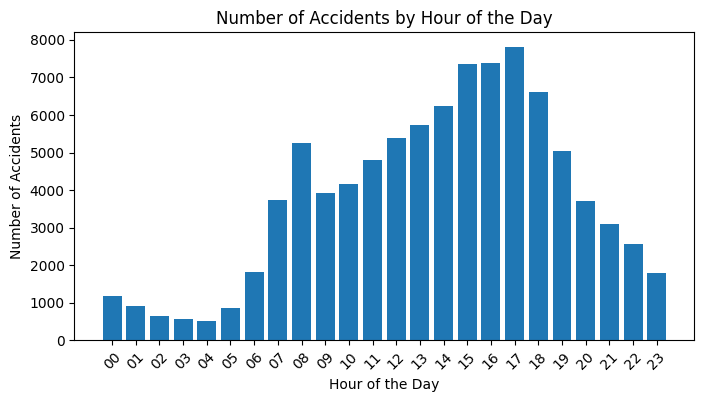

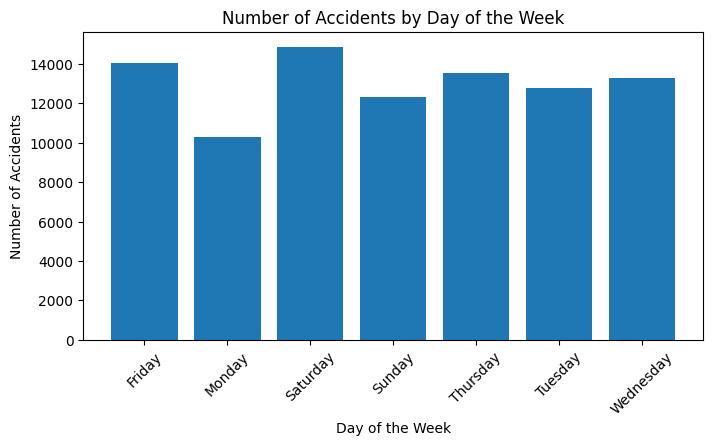

In [220]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by hour and count the number of accidents in each hour
hourly_accidents = df_accident.groupby('hour')['accident_index'].count()

# Group the data by day of the week and count the number of accidents on each day
daily_accidents = df_accident.groupby('day_of_week_label')['accident_index'].count()

# Plot the number of accidents by hour
plt.figure(figsize=(8, 4))
plt.bar(hourly_accidents.index, hourly_accidents.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Hour of the Day')
plt.xticks(rotation=45)
plt.show()

# Plot the number of accidents by day of the week
plt.figure(figsize=(8, 4))
plt.bar(daily_accidents.index, daily_accidents.values)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Day of the Week')
plt.xticks(rotation=45)
plt.show()


### 2. For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur? We suggest a focus on: Motorcycle 125cc and under, Motorcycle over 125cc and up to 500cc, and Motorcycle over 500cc.

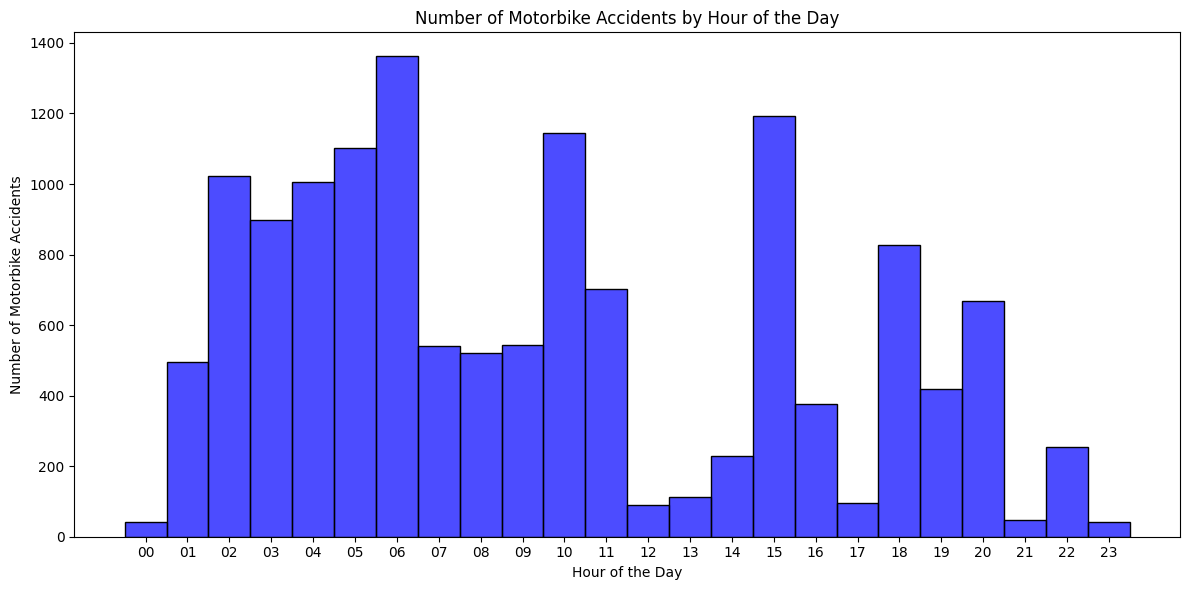

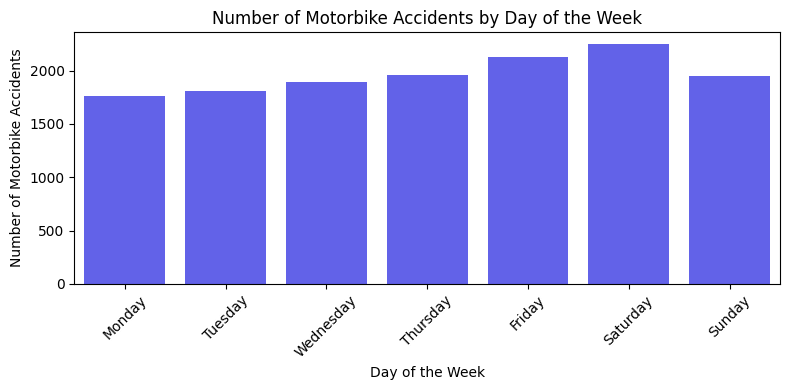

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the df_vehicle DataFrame to focus on motorcycles
motorbike_df = df_vehicle[df_vehicle['vehicle_type'].isin(['02', '03', '04', '05'])]

# Create the histogram for motorbikes by hour of the day
plt.figure(figsize=(12, 6))
sns.histplot(data=df_accident[df_accident['accident_index'].isin(motorbike_df['accident_index'])], x='hour', bins=24, kde=False, color='blue', alpha=0.7)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Motorbike Accidents')
plt.title('Number of Motorbike Accidents by Hour of the Day')
plt.xticks(range(24), ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'])
plt.tight_layout()
plt.show()

# Create the bar plot for motorbikes by day of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(8, 4))
sns.countplot(data=df_accident[df_accident['accident_index'].isin(motorbike_df['accident_index'])], x='day_of_week_label', order=day_order, color='blue', alpha=0.7)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Motorbike Accidents')
plt.title('Number of Motorbike Accidents by Day of the Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 3. For pedestrians involved in accidents, are there significant hours of the day, and days of the week, on which they are more likely to be involved?

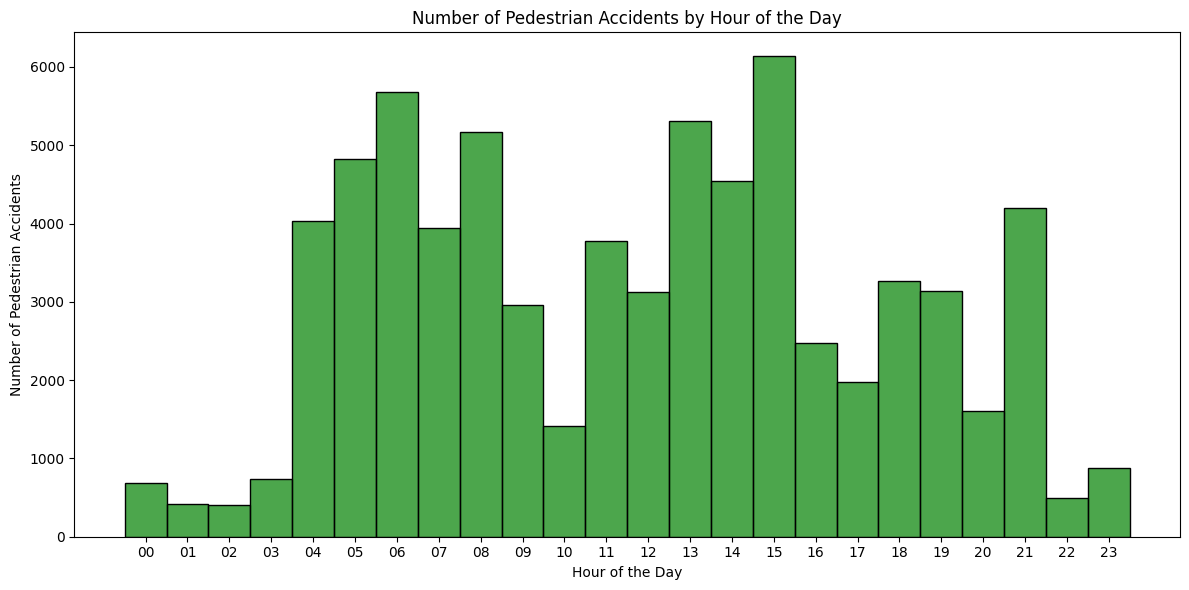

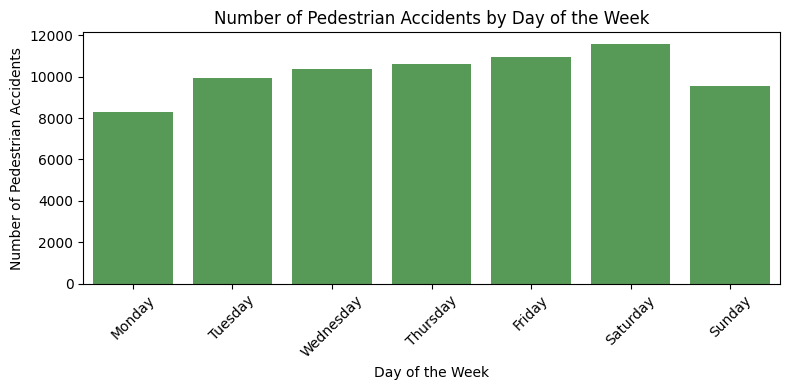

In [222]:

import seaborn as sns

# Filter the df_casualty DataFrame to focus on pedestrian-related accidents
pedestrian_df = df_casualty[df_casualty['casualty_class'] == 1]

# Create the histogram for pedestrian accidents by hour of the day
plt.figure(figsize=(12, 6))
sns.histplot(data=df_accident[df_accident['accident_index'].isin(pedestrian_df['accident_index'])], x='hour', bins=24, kde=False, color='green', alpha=0.7)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pedestrian Accidents')
plt.title('Number of Pedestrian Accidents by Hour of the Day')
plt.xticks(range(24), ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'])
plt.tight_layout()
plt.show()

# Create the bar plot for pedestrian accidents by day of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(8, 4))
sns.countplot(data=df_accident[df_accident['accident_index'].isin(pedestrian_df['accident_index'])], x='day_of_week_label', order=day_order, color='green', alpha=0.7)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pedestrian Accidents')
plt.title('Number of Pedestrian Accidents by Day of the Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


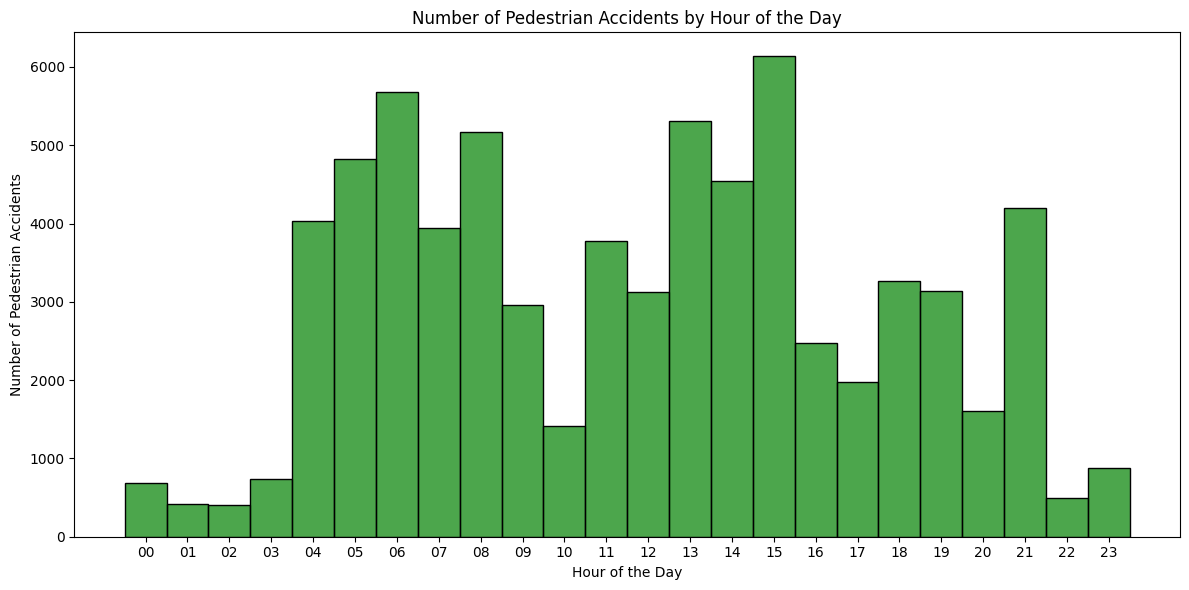

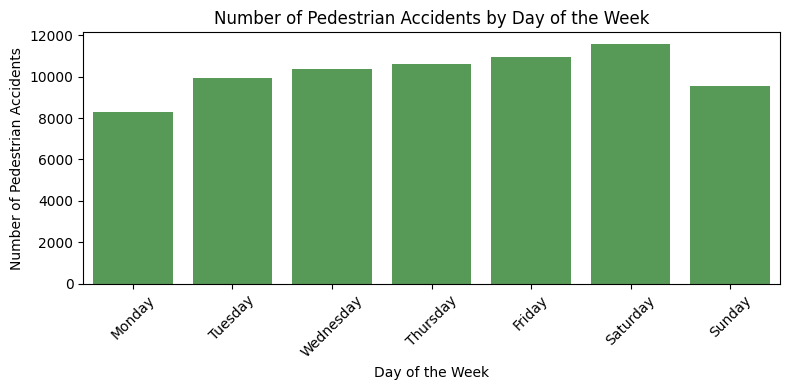

In [223]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the df_casualty DataFrame to focus on pedestrian-related accidents
pedestrian_df = df_casualty[df_casualty['casualty_class'] == 1]

# Create the histogram for pedestrian accidents by hour of the day
plt.figure(figsize=(12, 6))
sns.histplot(data=df_accident[df_accident['accident_index'].isin(pedestrian_df['accident_index'])], x='hour', bins=24, kde=False, color='green', alpha=0.7)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pedestrian Accidents')
plt.title('Number of Pedestrian Accidents by Hour of the Day')
plt.xticks(range(24), ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'])
plt.tight_layout()
plt.show()

# Create the bar plot for pedestrian accidents by day of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(8, 4))
sns.countplot(data=df_accident[df_accident['accident_index'].isin(pedestrian_df['accident_index'])], x='day_of_week_label', order=day_order, color='green', alpha=0.7)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pedestrian Accidents')
plt.title('Number of Pedestrian Accidents by Day of the Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Using the apriori algorithm, explore the impact of selected variables on accident severity.

In [224]:
df_accident_copy = df_accident.copy() #Creating a copy of the dataframe

In [225]:
df_accident_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91185 entries, 0 to 91198
Data columns (total 39 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91185 non-null  object 
 1   accident_year                                91185 non-null  int64  
 2   accident_reference                           91185 non-null  object 
 3   location_easting_osgr                        91185 non-null  float64
 4   location_northing_osgr                       91185 non-null  float64
 5   longitude                                    91185 non-null  float64
 6   latitude                                     91185 non-null  float64
 7   police_force                                 91185 non-null  object 
 8   accident_severity                            91185 non-null  int64  
 9   number_of_vehicles                           91185 non-null  object 
 10

In [226]:
df_accident_copy.corr()

C:\Users\693957\AppData\Local\Temp\ipykernel_7544\1733154681.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_accident_copy.corr()


,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,accident_severity,day_of_week,local_authority_district,first_road_class,junction_control,...,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag
accident_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location_easting_osgr,NaN,1.000000,-0.408338,0.999464,-0.410957,0.059628,0.000674,-0.381901,-0.037070,-0.031301,...,0.039761,0.078132,0.012314,0.019488,0.019488,0.083818,-0.000647,-0.121276,0.146723,-0.017631
location_northing_osgr,NaN,-0.408338,1.000000,-0.415644,0.999969,-0.086634,0.000610,0.086725,0.043110,0.022780,...,-0.012005,-0.038101,-0.009257,-0.007997,-0.007997,-0.069032,0.001831,0.051715,-0.044178,0.023623
longitude,NaN,0.999464,-0.415644,1.000000,-0.418186,0.060969,0.000330,-0.388652,-0.035210,-0.030108,...,0.038560,0.076444,0.011869,0.018694,0.018694,0.082851,-0.001259,-0.118561,0.144417,-0.018900
latitude,NaN,-0.410957,0.999969,-0.418186,1.000000,-0.086454,0.000594,0.085494,0.043158,0.022730,...,-0.012218,-0.037950,-0.009281,-0.008167,-0.008167,-0.069261,0.001619,0.051180,-0.044715,0.023583
accident_severity,NaN,0.059628,-0.086634,0.060969,-0.086454,1.000000,0.000723,-0.099987,0.005577,-0.034302,...,0.004540,0.030838,-0.040831,0.032355,0.032355,0.030545,-0.009441,-0.114340,0.156899,0.003133
day_of_week,NaN,0.000674,0.000610,0.000330,0.000594,0.000723,1.000000,-0.002244,0.004018,0.008319,...,-0.002572,0.002164,0.019925,-0.000113,-0.000113,-0.000700,-0.005087,-0.015609,0.003987,0.006463
local_authority_district,NaN,-0.381901,0.086725,-0.388652,0.085494,-0.099987,-0.002244,1.000000,0.058835,0.136798,...,-0.047161,-0.153255,-0.003486,-0.037654,-0.037654,-0.124841,0.025660,0.309337,-0.208915,-0.054135
first_road_class,NaN,-0.037070,0.043110,-0.035210,0.043158,0.005577,0.004018,0.058835,1.000000,0.131052,...,-0.018220,-0.130677,-0.040273,-0.006477,-0.006477,-0.030154,-0.015447,-0.158037,0.021151,0.353188
junction_control,NaN,-0.031301,0.022780,-0.030108,0.022730,-0.034302,0.008319,0.136798,0.131052,1.000000,...,-0.077186,-0.310375,-0.018679,-0.015406,-0.015406,-0.044400,0.003073,0.122352,-0.075274,-0.013292


In [227]:
df_accident_copy

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,hour,minute,day_of_week_label
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,01,3,001,...,9.0,0.0,0.0,1,3.0,2.0,E01004576,09,00,Wednesday
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,01,3,001,...,1.0,0.0,0.0,1,1.0,2.0,E01003034,13,55,Tuesday
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,01,3,001,...,1.0,0.0,0.0,1,1.0,2.0,E01004726,01,25,Thursday
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,01,2,001,...,1.0,0.0,0.0,1,1.0,2.0,E01003617,01,50,Thursday
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,01,3,001,...,1.0,0.0,0.0,1,1.0,2.0,E01004763,02,25,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,93,2,002,...,1.0,0.0,0.0,1,1.0,2.0,E01027378,14,30,Thursday
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,97,3,001,...,1.0,0.0,0.0,1,2.0,2.0,E01019114,15,05,Saturday
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,92,2,002,...,1.0,0.0,0.0,2,1.0,2.0,E01027378,12,42,Thursday
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,97,3,002,...,1.0,0.0,0.0,1,2.0,2.0,E01019102,14,00,Wednesday


In [228]:
df_accident_copy['accident_severity'].unique()

array([3, 2, 1], dtype=int64)

In [229]:

# Calculate the correlation of each column with 'accident_severity'
correlation_with_severity = df_accident_copy.corrwith(df_accident_copy['accident_severity']).sort_values(ascending=False)

# Display the correlation in descending order
print(correlation_with_severity)


accident_severity                              1.000000
did_police_officer_attend_scene_of_accident    0.156899
longitude                                      0.060969
location_easting_osgr                          0.059628
road_surface_conditions                        0.032355
weather_conditions                             0.032355
pedestrian_crossing_physical_facilities        0.030838
special_conditions_at_site                     0.030545
first_road_class                               0.005577
pedestrian_crossing_human_control              0.004540
trunk_road_flag                                0.003133
day_of_week                                    0.000723
carriageway_hazards                           -0.009441
second_road_class                             -0.022961
junction_control                              -0.034302
light_conditions                              -0.040831
latitude                                      -0.086454
location_northing_osgr                        -0

C:\Users\693957\AppData\Local\Temp\ipykernel_7544\51343191.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_severity = df_accident_copy.corrwith(df_accident_copy['accident_severity']).sort_values(ascending=False)


In [230]:
pd.set_option('display.max_columns', None)


In [231]:
df_accident_copy

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,hour,minute,day_of_week_label
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,01,3,001,001,04022020,3,0900,10,E09000032,E09000032,6,3036,Single carriageway,020,00,2.0,6.0,0406,0.0,4.0,1.0,9.0,9.0,0.0,0.0,1,3.0,2.0,E01004576,09,00,Wednesday
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,01,3,001,002,27042020,2,1355,9,E09000022,E09000022,3,3036,Single carriageway,020,09,2.0,6.0,0406,0.0,4.0,1.0,1.0,1.0,0.0,0.0,1,1.0,2.0,E01003034,13,55,Tuesday
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,01,3,001,001,01012020,4,0125,1,E09000033,E09000033,5,3036,Single carriageway,030,03,1.0,6.0,0406,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1,1.0,2.0,E01004726,01,25,Thursday
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,01,2,001,001,01012020,4,0150,17,E09000025,E09000025,3,0011,Single carriageway,030,00,1.0,6.0,0406,0.0,4.0,4.0,1.0,1.0,0.0,0.0,1,1.0,2.0,E01003617,01,50,Thursday
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,01,3,001,002,01012020,4,0225,1,E09000033,E09000033,3,0040,Single carriageway,030,03,4.0,5.0,0406,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1,1.0,2.0,E01004763,02,25,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,93,2,002,001,12082020,4,1430,918,S12000042,S12000042,4,0959,Single carriageway,030,01,4.0,4.0,0959,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1,1.0,2.0,E01027378,14,30,Thursday
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,97,3,001,001,13112020,6,1505,922,S12000011,S12000011,6,0959,Unknown,030,03,4.0,6.0,0959,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1,2.0,2.0,E01019114,15,05,Saturday
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,92,2,002,001,15042020,4,1242,910,S12000033,S12000033,4,0979,Single carriageway,060,08,4.0,6.0,0959,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2,1.0,2.0,E01027378,12,42,Thursday
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,97,3,002,001,15122020,3,1400,932,S12000044,S12000044,6,0979,Single carriageway,030,03,4.0,6.0,0959,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1,2.0,2.0,E01019102,14,00,Wednesday


In [232]:
df_accident_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91185 entries, 0 to 91198
Data columns (total 39 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91185 non-null  object 
 1   accident_year                                91185 non-null  int64  
 2   accident_reference                           91185 non-null  object 
 3   location_easting_osgr                        91185 non-null  float64
 4   location_northing_osgr                       91185 non-null  float64
 5   longitude                                    91185 non-null  float64
 6   latitude                                     91185 non-null  float64
 7   police_force                                 91185 non-null  object 
 8   accident_severity                            91185 non-null  int64  
 9   number_of_vehicles                           91185 non-null  object 
 10

In [233]:
columns_to_drop = ['accident_index', 'lsoa_of_accident_location', 'date','time','local_authority_district','local_authority_ons_district','local_authority_highway','did_police_officer_attend_scene_of_accident','accident_year','accident_reference','hour','day_of_week_label','minute']
df_accident_copy = df_accident_copy.drop(columns=columns_to_drop)


In [234]:
df_accident_copy

,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag
0,521389.0,175144.0,-0.254001,51.462262,01,3,001,001,3,6,3036,Single carriageway,020,00,2.0,6.0,0406,0.0,4.0,1.0,9.0,9.0,0.0,0.0,1,2.0
1,529337.0,176237.0,-0.139253,51.470327,01,3,001,002,2,3,3036,Single carriageway,020,09,2.0,6.0,0406,0.0,4.0,1.0,1.0,1.0,0.0,0.0,1,2.0
2,526432.0,182761.0,-0.178719,51.529614,01,3,001,001,4,5,3036,Single carriageway,030,03,1.0,6.0,0406,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1,2.0
3,538676.0,184371.0,-0.001683,51.541210,01,2,001,001,4,3,0011,Single carriageway,030,00,1.0,6.0,0406,0.0,4.0,4.0,1.0,1.0,0.0,0.0,1,2.0
4,529324.0,181286.0,-0.137592,51.515704,01,3,001,002,4,3,0040,Single carriageway,030,03,4.0,5.0,0406,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,343034.0,731654.0,-2.926320,56.473539,93,2,002,001,4,4,0959,Single carriageway,030,01,4.0,4.0,0959,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1,2.0
91195,257963.0,658891.0,-4.267565,55.802353,97,3,001,001,6,6,0959,Unknown,030,03,4.0,6.0,0959,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1,2.0
91196,383664.0,810646.0,-2.271903,57.186317,92,2,002,001,4,4,0979,Single carriageway,060,08,4.0,6.0,0959,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2,2.0
91197,277161.0,674852.0,-3.968753,55.950940,97,3,002,001,3,6,0979,Single carriageway,030,03,4.0,6.0,0959,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1,2.0


In [235]:
df_accident_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91185 entries, 0 to 91198
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   location_easting_osgr                    91185 non-null  float64
 1   location_northing_osgr                   91185 non-null  float64
 2   longitude                                91185 non-null  float64
 3   latitude                                 91185 non-null  float64
 4   police_force                             91185 non-null  object 
 5   accident_severity                        91185 non-null  int64  
 6   number_of_vehicles                       91185 non-null  object 
 7   number_of_casualties                     91185 non-null  object 
 8   day_of_week                              91185 non-null  int64  
 9   first_road_class                         91185 non-null  int64  
 10  first_road_number                        91185

In [236]:
def convert_integer_strings_to_int(df):
    for col in df.columns:
        # Check if the column contains integer strings
        if df[col].apply(lambda x: str(x).isdigit()).all():
            df[col] = df[col].astype(int)
    return df


df_accident_copy = convert_integer_strings_to_int(df_accident_copy)


In [237]:
df_accident_copy

,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag
0,521389.0,175144.0,-0.254001,51.462262,1,3,1,1,3,6,3036,Single carriageway,20,0,2.0,6.0,406,0.0,4.0,1.0,9.0,9.0,0.0,0.0,1,2.0
1,529337.0,176237.0,-0.139253,51.470327,1,3,1,2,2,3,3036,Single carriageway,20,9,2.0,6.0,406,0.0,4.0,1.0,1.0,1.0,0.0,0.0,1,2.0
2,526432.0,182761.0,-0.178719,51.529614,1,3,1,1,4,5,3036,Single carriageway,30,3,1.0,6.0,406,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1,2.0
3,538676.0,184371.0,-0.001683,51.541210,1,2,1,1,4,3,11,Single carriageway,30,0,1.0,6.0,406,0.0,4.0,4.0,1.0,1.0,0.0,0.0,1,2.0
4,529324.0,181286.0,-0.137592,51.515704,1,3,1,2,4,3,40,Single carriageway,30,3,4.0,5.0,406,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,343034.0,731654.0,-2.926320,56.473539,93,2,2,1,4,4,959,Single carriageway,30,1,4.0,4.0,959,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1,2.0
91195,257963.0,658891.0,-4.267565,55.802353,97,3,1,1,6,6,959,Unknown,30,3,4.0,6.0,959,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1,2.0
91196,383664.0,810646.0,-2.271903,57.186317,92,2,2,1,4,4,979,Single carriageway,60,8,4.0,6.0,959,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2,2.0
91197,277161.0,674852.0,-3.968753,55.950940,97,3,2,1,3,6,979,Single carriageway,30,3,4.0,6.0,959,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1,2.0


In [238]:
road_type_mapping = {
    'Roundabout': 1,
    'One way street': 2,
    'Dual carriageway': 3,
    'Single carriageway': 6,
    'Slip Road': 7,
    'Unknown': 9
}

# Create a new column 'road_type_number' using the mapping
df_accident_copy['road_type_number'] = df_accident_copy['road_type'].map(road_type_mapping)


df_accident_copy


,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,road_type_number
0,521389.0,175144.0,-0.254001,51.462262,1,3,1,1,3,6,3036,Single carriageway,20,0,2.0,6.0,406,0.0,4.0,1.0,9.0,9.0,0.0,0.0,1,2.0,6
1,529337.0,176237.0,-0.139253,51.470327,1,3,1,2,2,3,3036,Single carriageway,20,9,2.0,6.0,406,0.0,4.0,1.0,1.0,1.0,0.0,0.0,1,2.0,6
2,526432.0,182761.0,-0.178719,51.529614,1,3,1,1,4,5,3036,Single carriageway,30,3,1.0,6.0,406,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1,2.0,6
3,538676.0,184371.0,-0.001683,51.541210,1,2,1,1,4,3,11,Single carriageway,30,0,1.0,6.0,406,0.0,4.0,4.0,1.0,1.0,0.0,0.0,1,2.0,6
4,529324.0,181286.0,-0.137592,51.515704,1,3,1,2,4,3,40,Single carriageway,30,3,4.0,5.0,406,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1,2.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,343034.0,731654.0,-2.926320,56.473539,93,2,2,1,4,4,959,Single carriageway,30,1,4.0,4.0,959,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1,2.0,6
91195,257963.0,658891.0,-4.267565,55.802353,97,3,1,1,6,6,959,Unknown,30,3,4.0,6.0,959,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1,2.0,9
91196,383664.0,810646.0,-2.271903,57.186317,92,2,2,1,4,4,979,Single carriageway,60,8,4.0,6.0,959,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2,2.0,6
91197,277161.0,674852.0,-3.968753,55.950940,97,3,2,1,3,6,979,Single carriageway,30,3,4.0,6.0,959,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1,2.0,6


In [239]:
df_accident_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91185 entries, 0 to 91198
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   location_easting_osgr                    91185 non-null  float64
 1   location_northing_osgr                   91185 non-null  float64
 2   longitude                                91185 non-null  float64
 3   latitude                                 91185 non-null  float64
 4   police_force                             91185 non-null  int32  
 5   accident_severity                        91185 non-null  int32  
 6   number_of_vehicles                       91185 non-null  int32  
 7   number_of_casualties                     91185 non-null  int32  
 8   day_of_week                              91185 non-null  int32  
 9   first_road_class                         91185 non-null  int32  
 10  first_road_number                        91185

In [240]:
column_to_drop = 'road_type'
df_accident_copy = df_accident_copy.drop(columns=column_to_drop)
df_accident_copy

,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,first_road_class,first_road_number,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,road_type_number
0,521389.0,175144.0,-0.254001,51.462262,1,3,1,1,3,6,3036,20,0,2.0,6.0,406,0.0,4.0,1.0,9.0,9.0,0.0,0.0,1,2.0,6
1,529337.0,176237.0,-0.139253,51.470327,1,3,1,2,2,3,3036,20,9,2.0,6.0,406,0.0,4.0,1.0,1.0,1.0,0.0,0.0,1,2.0,6
2,526432.0,182761.0,-0.178719,51.529614,1,3,1,1,4,5,3036,30,3,1.0,6.0,406,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1,2.0,6
3,538676.0,184371.0,-0.001683,51.541210,1,2,1,1,4,3,11,30,0,1.0,6.0,406,0.0,4.0,4.0,1.0,1.0,0.0,0.0,1,2.0,6
4,529324.0,181286.0,-0.137592,51.515704,1,3,1,2,4,3,40,30,3,4.0,5.0,406,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1,2.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,343034.0,731654.0,-2.926320,56.473539,93,2,2,1,4,4,959,30,1,4.0,4.0,959,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1,2.0,6
91195,257963.0,658891.0,-4.267565,55.802353,97,3,1,1,6,6,959,30,3,4.0,6.0,959,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1,2.0,9
91196,383664.0,810646.0,-2.271903,57.186317,92,2,2,1,4,4,979,60,8,4.0,6.0,959,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2,2.0,6
91197,277161.0,674852.0,-3.968753,55.950940,97,3,2,1,3,6,979,30,3,4.0,6.0,959,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1,2.0,6


In [241]:
df_accident_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91185 entries, 0 to 91198
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   location_easting_osgr                    91185 non-null  float64
 1   location_northing_osgr                   91185 non-null  float64
 2   longitude                                91185 non-null  float64
 3   latitude                                 91185 non-null  float64
 4   police_force                             91185 non-null  int32  
 5   accident_severity                        91185 non-null  int32  
 6   number_of_vehicles                       91185 non-null  int32  
 7   number_of_casualties                     91185 non-null  int32  
 8   day_of_week                              91185 non-null  int32  
 9   first_road_class                         91185 non-null  int32  
 10  first_road_number                        91185

In [242]:
df_accident_copy.select_dtypes([np.number])

,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,first_road_class,first_road_number,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,road_type_number
0,521389.0,175144.0,-0.254001,51.462262,1,3,1,1,3,6,3036,20,0,2.0,6.0,406,0.0,4.0,1.0,9.0,9.0,0.0,0.0,1,2.0,6
1,529337.0,176237.0,-0.139253,51.470327,1,3,1,2,2,3,3036,20,9,2.0,6.0,406,0.0,4.0,1.0,1.0,1.0,0.0,0.0,1,2.0,6
2,526432.0,182761.0,-0.178719,51.529614,1,3,1,1,4,5,3036,30,3,1.0,6.0,406,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1,2.0,6
3,538676.0,184371.0,-0.001683,51.541210,1,2,1,1,4,3,11,30,0,1.0,6.0,406,0.0,4.0,4.0,1.0,1.0,0.0,0.0,1,2.0,6
4,529324.0,181286.0,-0.137592,51.515704,1,3,1,2,4,3,40,30,3,4.0,5.0,406,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1,2.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,343034.0,731654.0,-2.926320,56.473539,93,2,2,1,4,4,959,30,1,4.0,4.0,959,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1,2.0,6
91195,257963.0,658891.0,-4.267565,55.802353,97,3,1,1,6,6,959,30,3,4.0,6.0,959,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1,2.0,9
91196,383664.0,810646.0,-2.271903,57.186317,92,2,2,1,4,4,979,60,8,4.0,6.0,959,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2,2.0,6
91197,277161.0,674852.0,-3.968753,55.950940,97,3,2,1,3,6,979,30,3,4.0,6.0,959,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1,2.0,6


In [243]:
df_accident_copy.select_dtypes([np.number])

,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,first_road_class,first_road_number,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,road_type_number
0,521389.0,175144.0,-0.254001,51.462262,1,3,1,1,3,6,3036,20,0,2.0,6.0,406,0.0,4.0,1.0,9.0,9.0,0.0,0.0,1,2.0,6
1,529337.0,176237.0,-0.139253,51.470327,1,3,1,2,2,3,3036,20,9,2.0,6.0,406,0.0,4.0,1.0,1.0,1.0,0.0,0.0,1,2.0,6
2,526432.0,182761.0,-0.178719,51.529614,1,3,1,1,4,5,3036,30,3,1.0,6.0,406,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1,2.0,6
3,538676.0,184371.0,-0.001683,51.541210,1,2,1,1,4,3,11,30,0,1.0,6.0,406,0.0,4.0,4.0,1.0,1.0,0.0,0.0,1,2.0,6
4,529324.0,181286.0,-0.137592,51.515704,1,3,1,2,4,3,40,30,3,4.0,5.0,406,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1,2.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,343034.0,731654.0,-2.926320,56.473539,93,2,2,1,4,4,959,30,1,4.0,4.0,959,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1,2.0,6
91195,257963.0,658891.0,-4.267565,55.802353,97,3,1,1,6,6,959,30,3,4.0,6.0,959,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1,2.0,9
91196,383664.0,810646.0,-2.271903,57.186317,92,2,2,1,4,4,979,60,8,4.0,6.0,959,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2,2.0,6
91197,277161.0,674852.0,-3.968753,55.950940,97,3,2,1,3,6,979,30,3,4.0,6.0,959,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1,2.0,6


In [244]:
y_labels=pd.Series(df_accident_copy['accident_severity'])

In [245]:
y_labels

0        3
1        3
2        3
3        2
4        3
        ..
91194    2
91195    3
91196    2
91197    3
91198    3
Name: accident_severity, Length: 91185, dtype: int32

In [246]:
y_labels.value_counts()

3    71441
2    18353
1     1391
Name: accident_severity, dtype: int64

In [247]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 235.6/235.6 kB 7.0 MB/s eta 0:00:00
     ------------------------------------- 302.0/302.0 kB 18.2 MB/s eta 0:00:00
     ---------------------------------------- 9.2/9.2 MB 31.2 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [248]:
from imblearn.under_sampling import RandomUnderSampler

In [249]:
df_acc_balanced, y_balanced = RandomUnderSampler().fit_resample(df_accident_copy, y_labels)

In [250]:
y_balanced.value_counts()

1    1391
2    1391
3    1391
Name: accident_severity, dtype: int64

### Features Selection

In [251]:
column_to_remove = 'accident_severity'
df_acc_balanced = df_acc_balanced.drop(column_to_remove, axis =1)

In [252]:
df_acc_balanced

,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,number_of_vehicles,number_of_casualties,day_of_week,first_road_class,first_road_number,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,road_type_number
15,553007.0,190580.0,0.207510,51.593297,1,1,1,4,3,12,50,0,4.0,6.0,406,0.0,0.0,4.0,7.0,7.0,0.0,0.0,2,2.0,3
77,509181.0,172567.0,-0.430454,51.441583,1,1,1,5,5,232,40,0,4.0,3.0,3200,0.0,0.0,4.0,1.0,1.0,0.0,0.0,2,2.0,6
85,509650.0,184487.0,-0.420010,51.548632,1,2,1,6,3,40,60,0,4.0,6.0,3113,0.0,0.0,6.0,2.0,2.0,0.0,0.0,1,2.0,3
303,534071.0,176697.0,-0.070962,51.473359,1,1,1,4,3,202,30,3,2.0,6.0,501,0.0,5.0,1.0,1.0,1.0,0.0,0.0,1,2.0,6
511,527080.0,176147.0,-0.171763,51.470029,1,2,1,7,3,3205,30,6,2.0,5.0,1400,0.0,5.0,4.0,1.0,1.0,0.0,0.0,1,2.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80512,373038.0,165278.0,-2.388839,51.385897,52,2,1,5,3,431,30,1,4.0,6.0,4174,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1,2.0,1
78127,244764.0,126137.0,-4.214393,51.013599,50,3,1,2,6,379,30,0,4.0,3.0,379,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1,2.0,6
1876,541145.0,175818.0,0.030475,51.463742,1,2,1,1,3,2,50,0,4.0,3.0,110,0.0,0.0,1.0,2.0,2.0,0.0,0.0,1,2.0,7
23497,359256.0,412577.0,-2.617264,53.608170,4,2,1,6,6,583,20,0,4.0,3.0,585,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1,2.0,6


### Import select KBest and f_classif

In [253]:
from sklearn.feature_selection import SelectKBest, f_classif

### Object to select the best features

In [254]:
selector = SelectKBest(f_classif, k = 10)
selector.fit(df_acc_balanced, y_balanced)

SelectKBest()

In [255]:
mask = selector.get_support()

In [256]:
names = selector.feature_names_in_[mask]
names

array(['location_easting_osgr', 'location_northing_osgr', 'latitude',
       'police_force', 'number_of_casualties', 'first_road_class',
       'speed_limit', 'junction_detail', 'light_conditions',
       'urban_or_rural_area'], dtype=object)

In [257]:
scores = selector.scores_[mask]
scores

array([ 28.40100188,  38.52211538,  38.49747433,  47.61475991,
        52.02563952,  47.43720904, 227.24015729,  53.41175085,
        45.93650501, 169.41239136])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'location_easting_osgr'),
  Text(1, 0, 'location_northing_osgr'),
  Text(2, 0, 'latitude'),
  Text(3, 0, 'police_force'),
  Text(4, 0, 'number_of_casualties'),
  Text(5, 0, 'first_road_class'),
  Text(6, 0, 'speed_limit'),
  Text(7, 0, 'junction_detail'),
  Text(8, 0, 'light_conditions'),
  Text(9, 0, 'urban_or_rural_area')])

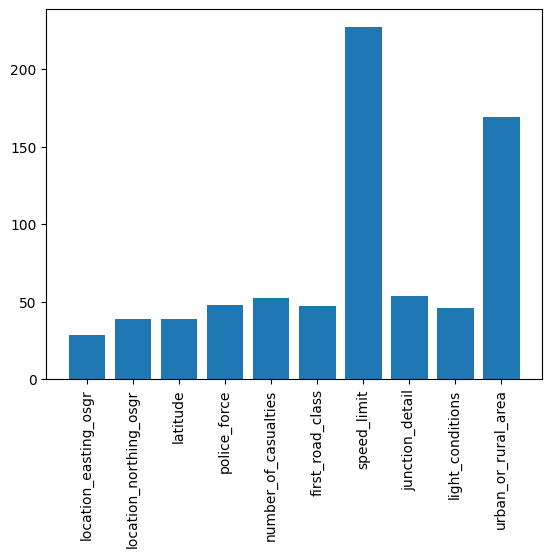

In [258]:
plt.bar(names, scores)
plt.xticks(rotation = "vertical")

In [259]:
df_accident_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91185 entries, 0 to 91198
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   location_easting_osgr                    91185 non-null  float64
 1   location_northing_osgr                   91185 non-null  float64
 2   longitude                                91185 non-null  float64
 3   latitude                                 91185 non-null  float64
 4   police_force                             91185 non-null  int32  
 5   accident_severity                        91185 non-null  int32  
 6   number_of_vehicles                       91185 non-null  int32  
 7   number_of_casualties                     91185 non-null  int32  
 8   day_of_week                              91185 non-null  int32  
 9   first_road_class                         91185 non-null  int32  
 10  first_road_number                        91185

In [260]:
# Assuming df_accident_copy is your DataFrame
df_accident_best = df_accident_copy[['police_force', 'first_road_class', 'light_conditions', 'special_conditions_at_site','number_of_vehicles','number_of_casualties','junction_detail','speed_limit', 'urban_or_rural_area', 'trunk_road_flag','pedestrian_crossing_physical_facilities','weather_conditions','road_type_number','accident_severity']]


In [261]:
# Assuming df_accident_best is your DataFrame
df_onehot = pd.get_dummies(df_accident_best, columns=['police_force', 'first_road_class', 'light_conditions', 'special_conditions_at_site','number_of_vehicles','number_of_casualties','junction_detail','speed_limit', 'urban_or_rural_area', 'trunk_road_flag','pedestrian_crossing_physical_facilities','road_type_number','weather_conditions','accident_severity'])


In [262]:
df_onehot

,police_force_1,police_force_3,police_force_4,police_force_5,police_force_6,police_force_7,police_force_10,police_force_11,police_force_12,police_force_13,police_force_14,police_force_16,police_force_17,police_force_20,police_force_21,police_force_22,police_force_23,police_force_30,police_force_31,police_force_32,police_force_33,police_force_34,police_force_35,police_force_36,police_force_37,police_force_40,police_force_41,police_force_42,police_force_43,police_force_44,police_force_45,police_force_46,police_force_47,police_force_48,police_force_50,police_force_52,police_force_53,police_force_54,police_force_55,police_force_60,police_force_61,police_force_62,police_force_63,police_force_91,police_force_92,police_force_93,police_force_94,police_force_95,police_force_96,police_force_97,police_force_98,first_road_class_1,first_road_class_2,first_road_class_3,first_road_class_4,first_road_class_5,first_road_class_6,light_conditions_1.0,light_conditions_4.0,light_conditions_5.0,light_conditions_6.0,light_conditions_7.0,special_conditions_at_site_0.0,special_conditions_at_site_1.0,special_conditions_at_site_2.0,special_conditions_at_site_3.0,special_conditions_at_site_4.0,special_conditions_at_site_5.0,special_conditions_at_site_6.0,special_conditions_at_site_7.0,special_conditions_at_site_9.0,number_of_vehicles_1,number_of_vehicles_2,number_of_vehicles_3,number_of_vehicles_4,number_of_vehicles_5,number_of_vehicles_6,number_of_vehicles_7,number_of_vehicles_8,number_of_vehicles_9,number_of_vehicles_10,number_of_vehicles_11,number_of_vehicles_12,number_of_vehicles_13,number_of_casualties_1,number_of_casualties_2,number_of_casualties_3,number_of_casualties_4,number_of_casualties_5,number_of_casualties_6,number_of_casualties_7,number_of_casualties_8,number_of_casualties_9,number_of_casualties_10,number_of_casualties_11,number_of_casualties_12,number_of_casualties_13,number_of_casualties_17,number_of_casualties_19,number_of_casualties_41,junction_detail_0,junction_detail_1,junction_detail_2,junction_detail_3,junction_detail_5,junction_detail_6,junction_detail_7,junction_detail_8,junction_detail_9,speed_limit_20,speed_limit_30,speed_limit_40,speed_limit_50,speed_limit_60,speed_limit_70,urban_or_rural_area_1,urban_or_rural_area_2,trunk_road_flag_1.0,trunk_road_flag_2.0,pedestrian_crossing_physical_facilities_0.0,pedestrian_crossing_physical_facilities_1.0,pedestrian_crossing_physical_facilities_4.0,pedestrian_crossing_physical_facilities_5.0,pedestrian_crossing_physical_facilities_7.0,pedestrian_crossing_physical_facilities_8.0,road_type_number_1,road_type_number_2,road_type_number_3,road_type_number_6,road_type_number_7,road_type_number_9,weather_conditions_1.0,weather_conditions_2.0,weather_conditions_3.0,weather_conditions_4.0,weather_conditions_5.0,weather_conditions_6.0,weather_conditions_7.0,weather_conditions_8.0,weather_conditions_9.0,accident_severity_1,accident_severity_2,accident_severity_3
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,

In [263]:

from mlxtend.frequent_patterns import apriori, association_rules


# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_onehot, min_support=0.6, use_colnames=True)

# Generate association rules from frequent itemsets
association_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the frequent itemsets and association rules
print("Frequent Itemsets:")
frequent_itemsets
print("\nAssociation Rules:")
association_rules


ModuleNotFoundError: No module named 'mlxtend'

In [ ]:
# Assuming your DataFrame is named "result_df"
# Filter the DataFrame to get only the rules where "accident_severity" appears in the consequents
accident_severity_impact = association_rules[association_rules['consequents'].apply(lambda x: any('accident_severity' in col for col in x))]

# Sort the rules by support in descending order
accident_severity_impact = accident_severity_impact.sort_values(by='support', ascending=False)

# Print the rules
accident_severity_impact
